# Project : Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [4]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Load the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Shape of the dataset
df.shape

(614, 13)

In [7]:
#Column Name 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Data Type of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#Check for Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Percentage of missing values w.r.t target variable i.e Loan_Status

#Only Numerical variables

In [12]:
df.groupby(['Loan_Status'])['Credit_History'].mean()

Loan_Status
N    0.541899
Y    0.981818
Name: Credit_History, dtype: float64

In [13]:
df.groupby(['Loan_Status'])['Loan_Amount_Term'].mean()

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [14]:
df.groupby(['Loan_Status'])['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [15]:
#Missing Values are present
#Using fillna method I will be eliminating the NaN values 

In [16]:
df.isnull().sum().sum()

149

In [17]:
#Treating Missing Values

In [18]:
#Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [20]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [21]:
#Married
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [23]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [24]:
#Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [26]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
#Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [29]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
#LoanAmount
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [31]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [32]:
#Loan_Amount_Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [34]:
#Credit History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [36]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [37]:
#Structural Format
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

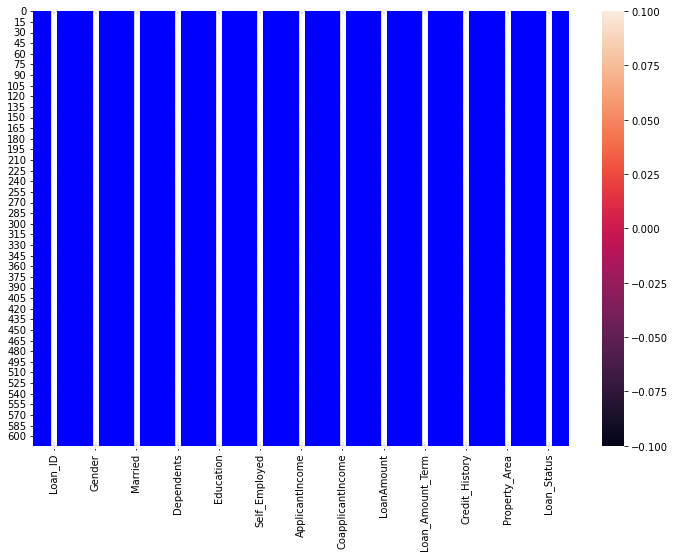

In [38]:
#Graphical Format
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),annot=True,linecolor='blue',linewidths=2)

I have replaced the missing values from the dataset.

Statistical Information

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [40]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


<AxesSubplot:>

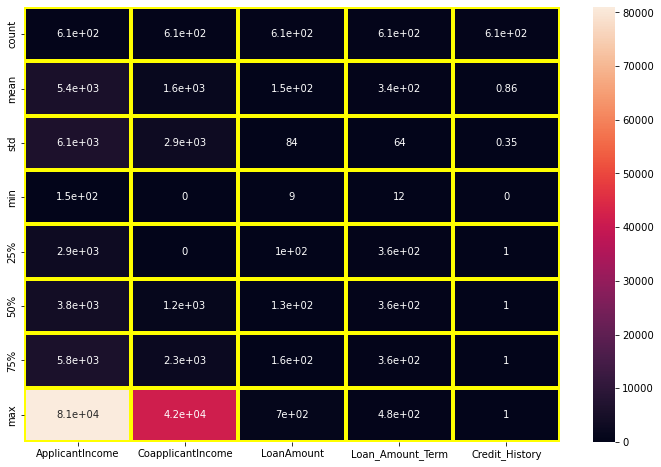

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),annot=True,linecolor='yellow',linewidths=4)

# Univariate Analysis 

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Exploring the Categorical Variables

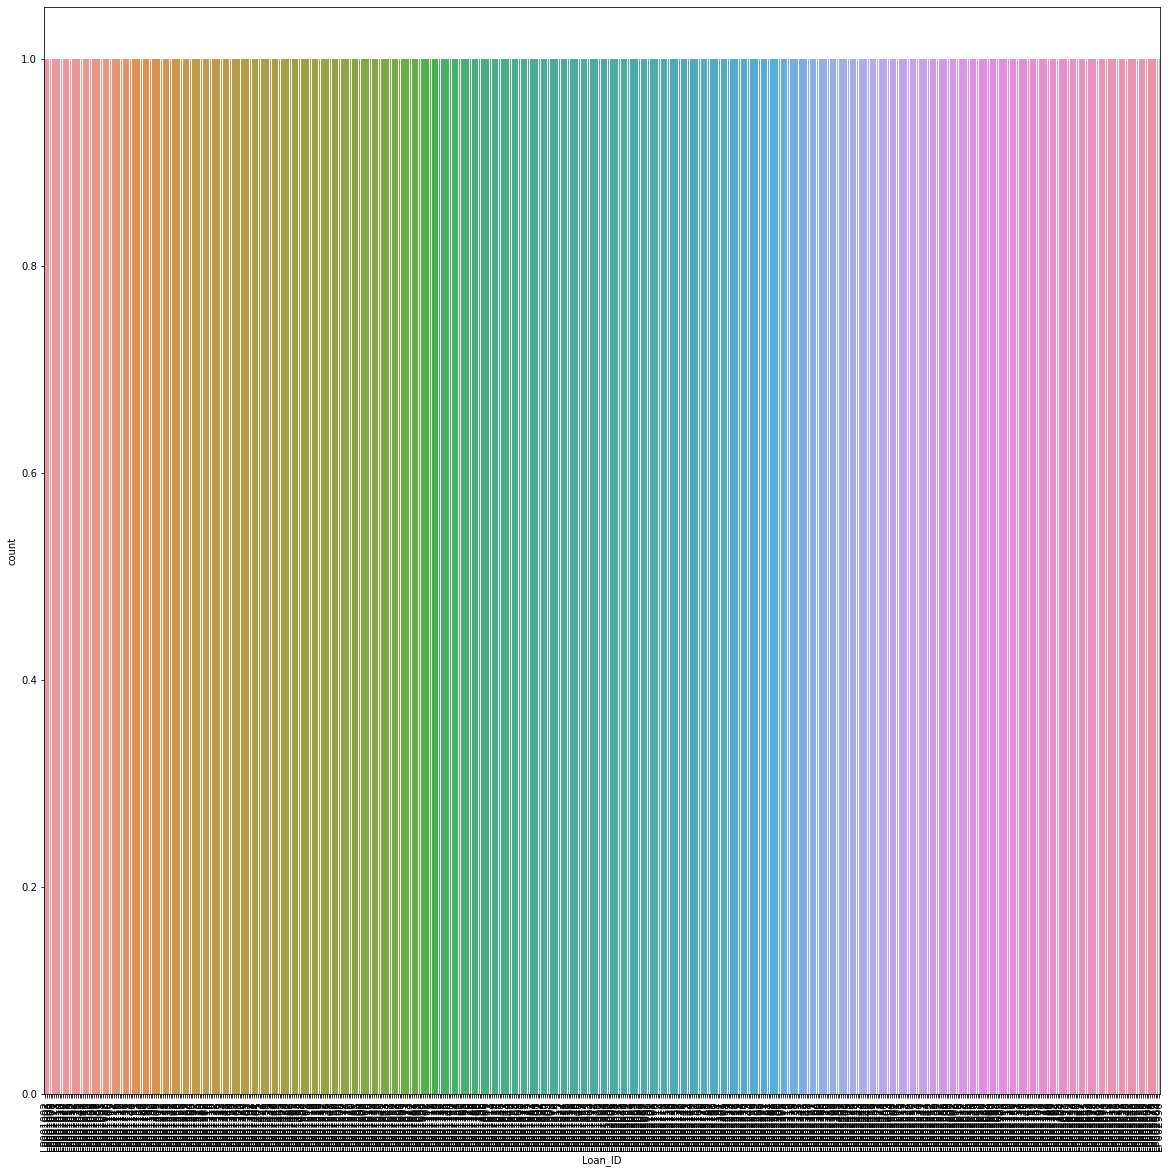

In [43]:
#Loan_ID
plt.figure(figsize=(20,20))
sns.countplot(df['Loan_ID'])
plt.xticks(rotation=90)
plt.show()

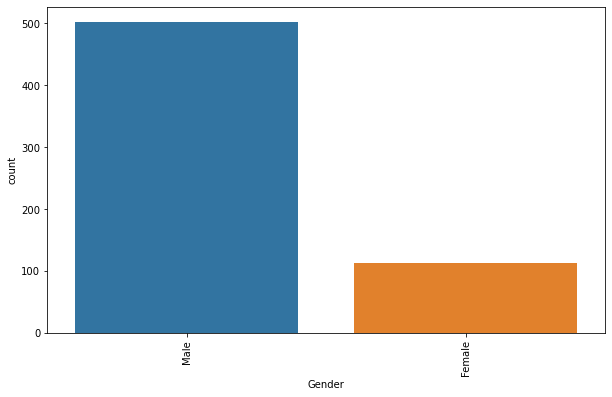

In [44]:
#Gender
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'])
plt.xticks(rotation=90)
plt.show()

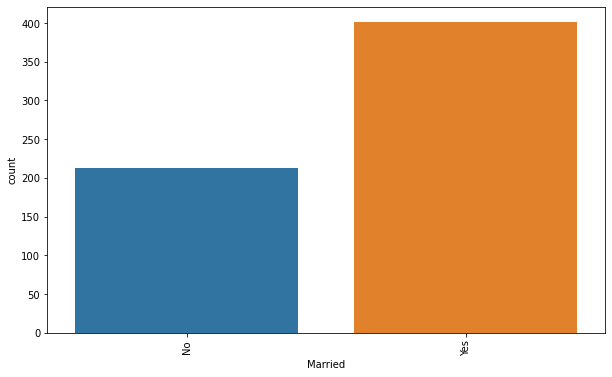

In [45]:
#Married
plt.figure(figsize=(10,6))
sns.countplot(df['Married'])
plt.xticks(rotation=90)
plt.show()

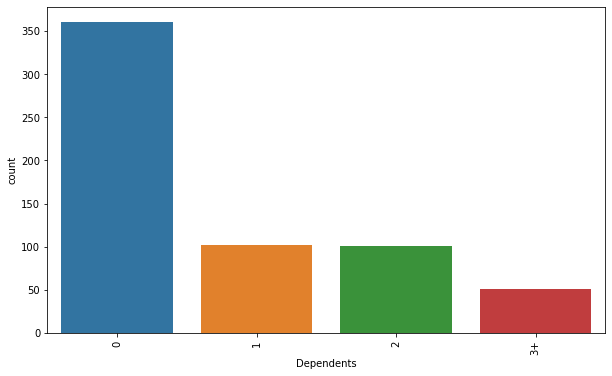

In [46]:
#Dependents
plt.figure(figsize=(10,6))
sns.countplot(df['Dependents'])
plt.xticks(rotation=90)
plt.show()

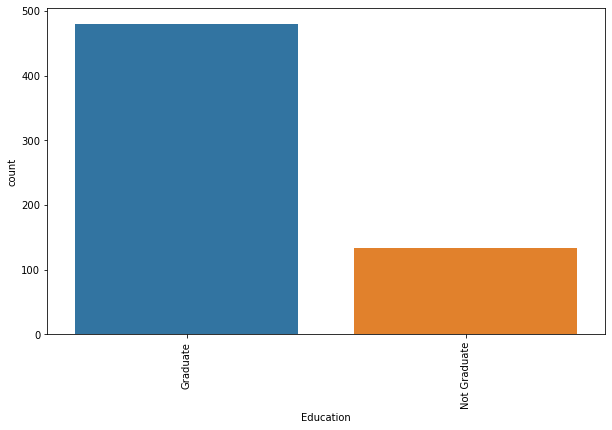

In [47]:
#Education
plt.figure(figsize=(10,6))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

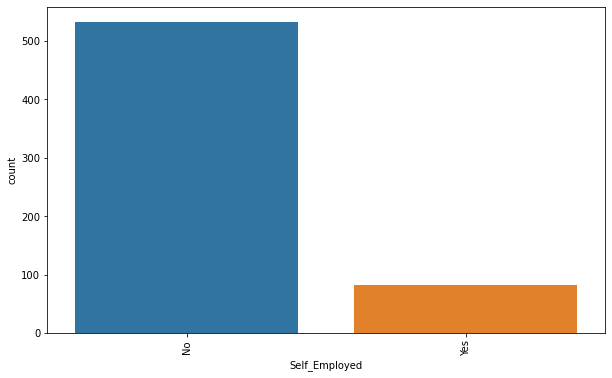

In [48]:
#Self_Employed
plt.figure(figsize=(10,6))
sns.countplot(df['Self_Employed'])
plt.xticks(rotation=90)
plt.show()

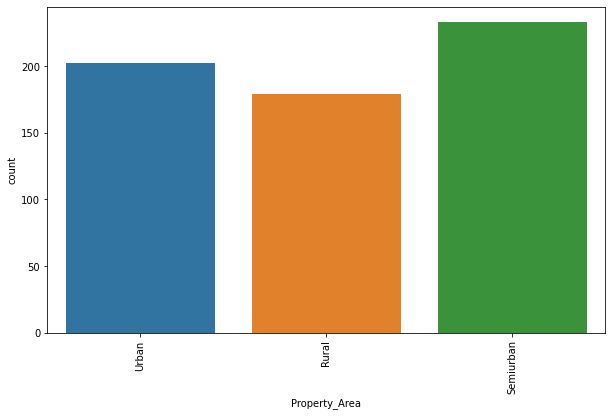

In [49]:
#Property_Area
plt.figure(figsize=(10,6))
sns.countplot(df['Property_Area'])
plt.xticks(rotation=90)
plt.show()

# Exploring Numerical Variables

# 1]Density plot

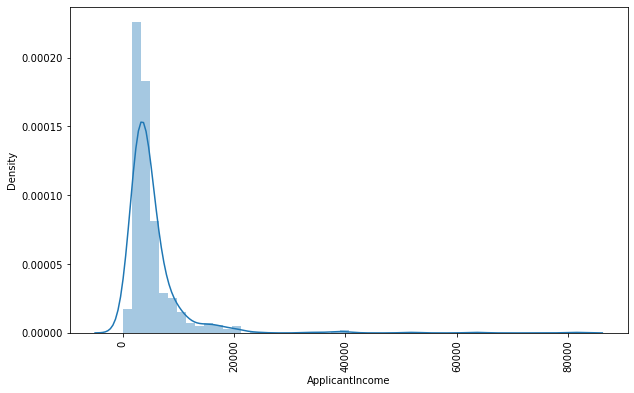

In [50]:
#ApplicantIncome
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'])
plt.xticks(rotation=90)
plt.show()

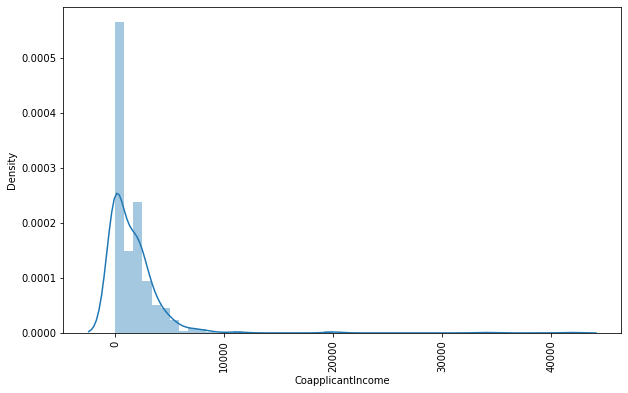

In [51]:
#CoapplicantIncome
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome'])
plt.xticks(rotation=90)
plt.show()

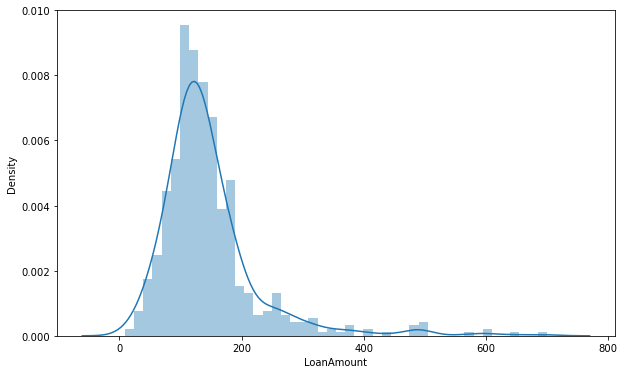

In [52]:
#LoanAmount
plt.figure(figsize=(10,6))
sns.distplot(df['LoanAmount'])
plt.show()

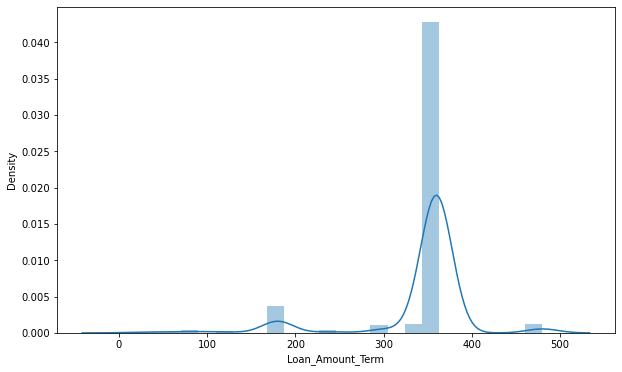

In [53]:
#LoanAmountTerm
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount_Term'])
plt.show()

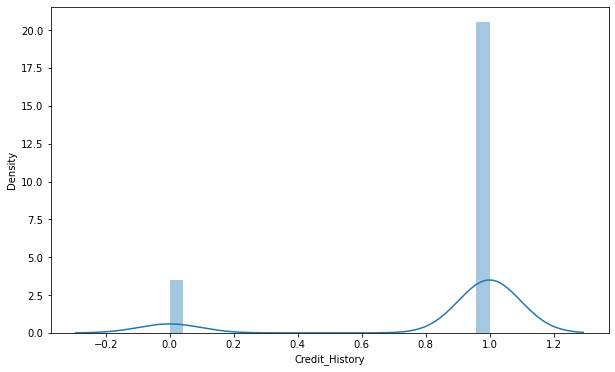

In [54]:
#CreditHistory
plt.figure(figsize=(10,6))
sns.distplot(df['Credit_History'])
plt.show()

# 2]Violin Plot

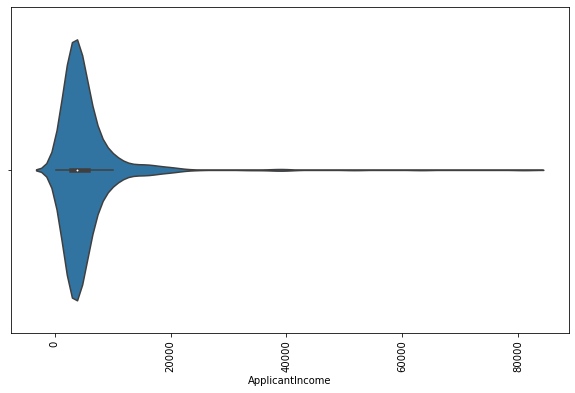

In [55]:
#ApplicantIncome
plt.figure(figsize=(10,6))
sns.violinplot(df['ApplicantIncome'])
plt.xticks(rotation=90)
plt.show()

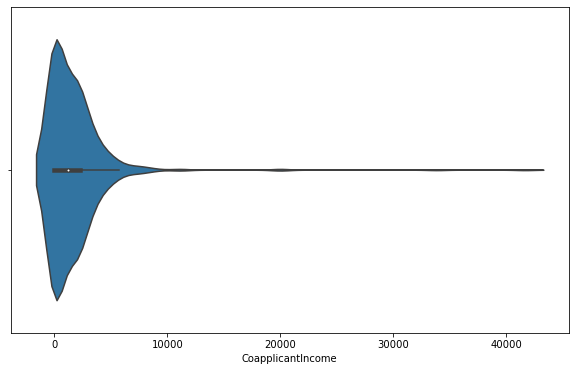

In [56]:
#CoapplicantIncome
plt.figure(figsize=(10,6))
sns.violinplot(df['CoapplicantIncome'])
plt.show()

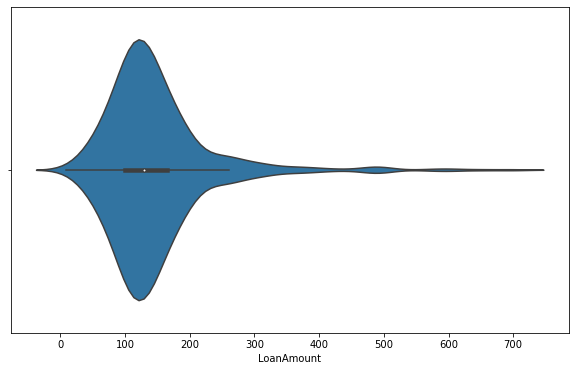

In [57]:
#LoanAmount
plt.figure(figsize=(10,6))
sns.violinplot(df['LoanAmount'])
plt.show()

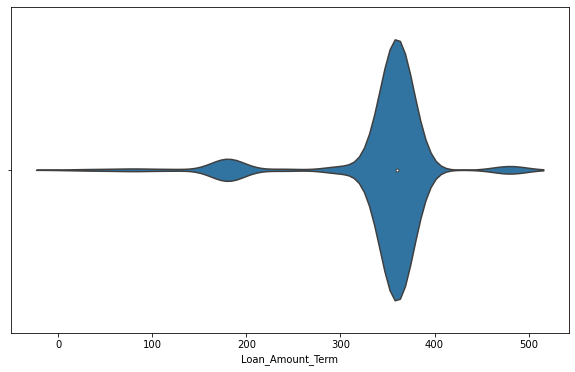

In [58]:
#LoanAmountTerm
plt.figure(figsize=(10,6))
sns.violinplot(df['Loan_Amount_Term'])
plt.show()

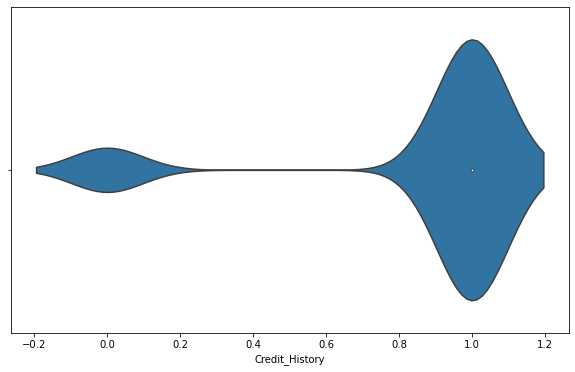

In [59]:
#CreditHistory
plt.figure(figsize=(10,6))
sns.violinplot(df['Credit_History'])
plt.show()

In [60]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

# Bivariate Analysis

Using swarm plot I will analyse the distribution between numerical variables vs target variable

Text(0.5, 1.0, 'ApplicantIncome vs Loan_Status')

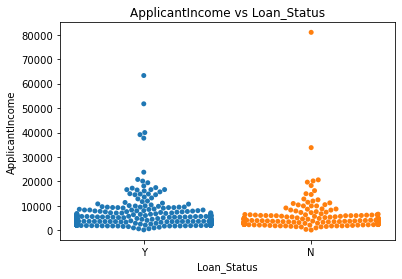

In [61]:
#ApplicantIncome vs Loan_Status
sns.swarmplot(df.Loan_Status,df.ApplicantIncome)
plt.title('ApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'CoApplicantIncome vs Loan_Status')

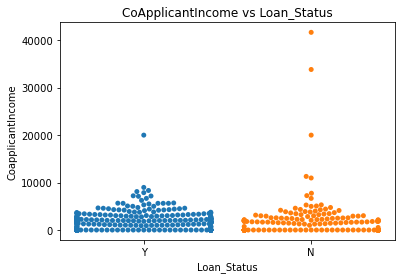

In [62]:
#CoApplicantIncome vs Loan_Status
sns.swarmplot(df.Loan_Status,df.CoapplicantIncome)
plt.title('CoApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'LoanAmount vs Loan_Status')

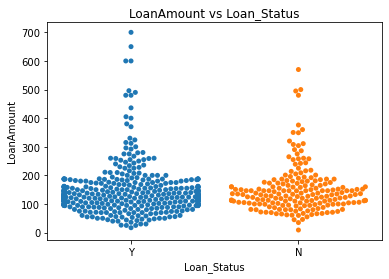

In [63]:
#LoanAmount vs Loan_Status
sns.swarmplot(df.Loan_Status,df.LoanAmount)
plt.title('LoanAmount vs Loan_Status')

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan_Status')

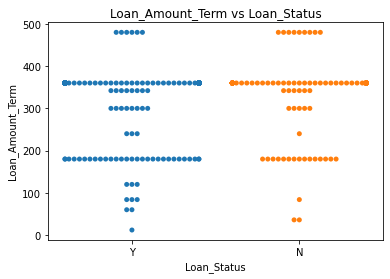

In [64]:
#Loan_Amount_Term vs Loan_Status
sns.swarmplot(df.Loan_Status,df.Loan_Amount_Term)
plt.title('Loan_Amount_Term vs Loan_Status')

Text(0.5, 1.0, 'Credit_History vs Loan_Status')

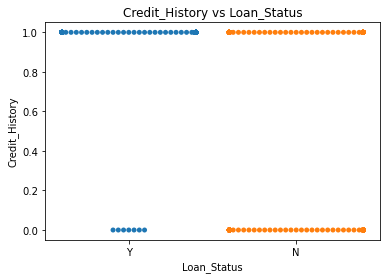

In [65]:
#Credit_history vs Loan_Status
sns.swarmplot(df.Loan_Status,df.Credit_History)
plt.title('Credit_History vs Loan_Status')

Using strip plot I will analyse the distribution between numerical variables vs target variable

Text(0.5, 1.0, 'ApplicantIncome vs Loan_Status')

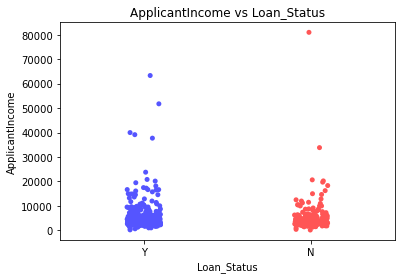

In [66]:
#ApplicantIncome vs Loan_Status
sns.stripplot(df.Loan_Status,df.ApplicantIncome,palette='seismic')
plt.title('ApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'CoApplicantIncome vs Loan_Status')

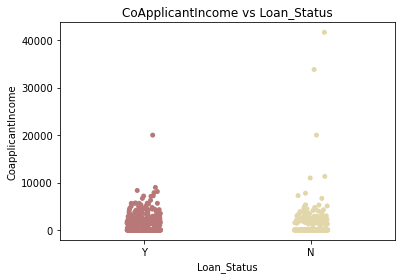

In [67]:
#CoApplicantIncome vs Loan_Status
sns.stripplot(df.Loan_Status,df.CoapplicantIncome,palette='pink')
plt.title('CoApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'LoanAmount vs Loan_Status')

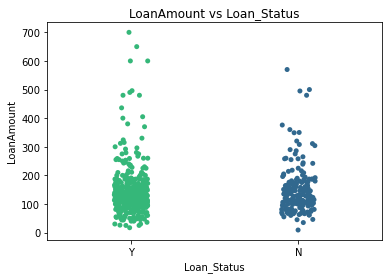

In [68]:
#LoanAmount vs Loan_Status
sns.stripplot(df.Loan_Status,df.LoanAmount,palette='viridis_r')
plt.title('LoanAmount vs Loan_Status')

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan_Status')

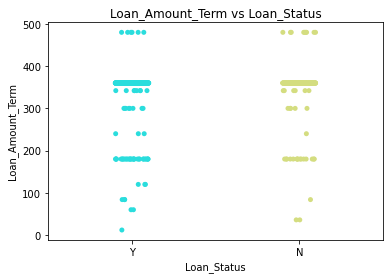

In [69]:
#Loan_Amount_Term vs Loan_Status
sns.stripplot(df.Loan_Status,df.Loan_Amount_Term,palette='rainbow')
plt.title('Loan_Amount_Term vs Loan_Status')

Text(0.5, 1.0, 'Credit_History vs Loan_Status')

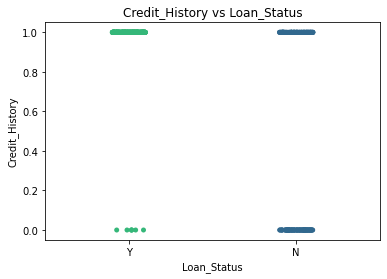

In [70]:
#Credit_history vs Loan_Status
sns.stripplot(df.Loan_Status,df.Credit_History,palette='viridis_r')
plt.title('Credit_History vs Loan_Status')

Now exploring numerical vs numerical with hue as the target variable i.e Loan_Status

Text(0, 0.5, 'CoApplicantIncome')

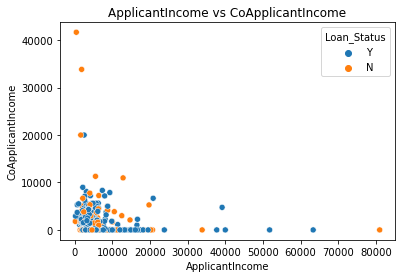

In [71]:
sns.scatterplot(df.ApplicantIncome, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('ApplicantIncome vs CoApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'CoApplicantIncome')

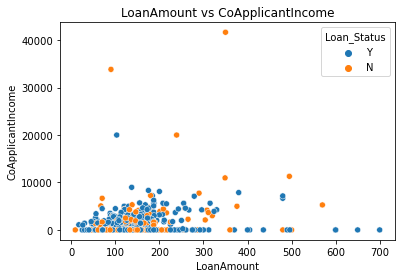

In [72]:
sns.scatterplot(df.LoanAmount, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('LoanAmount vs CoApplicantIncome')
plt.xlabel('LoanAmount')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'CoApplicantIncome')

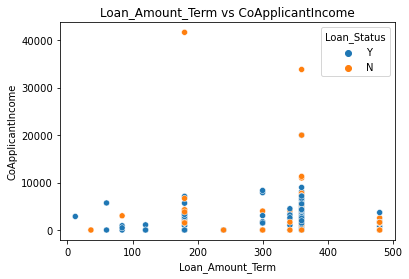

In [73]:
sns.scatterplot(df.Loan_Amount_Term, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs CoApplicantIncome')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'CoApplicantIncome')

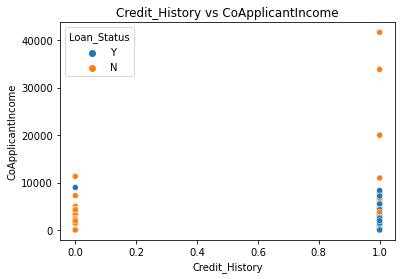

In [74]:
sns.scatterplot(df.Credit_History, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('Credit_History vs CoApplicantIncome')
plt.xlabel('Credit_History')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

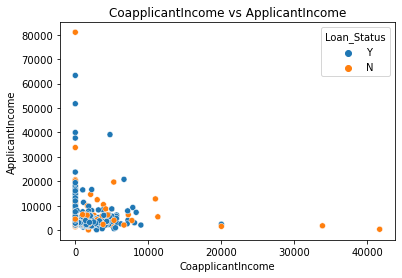

In [75]:
sns.scatterplot(df.CoapplicantIncome, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs ApplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

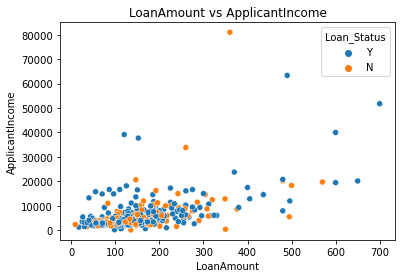

In [76]:
sns.scatterplot(df.LoanAmount, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('LoanAmount vs ApplicantIncome')
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

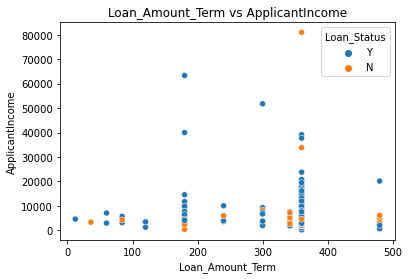

In [77]:
sns.scatterplot(df.Loan_Amount_Term, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs ApplicantIncome')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

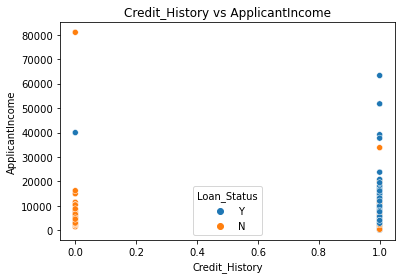

In [78]:
sns.scatterplot(df.Credit_History, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('Credit_History vs ApplicantIncome')
plt.xlabel('Credit_History')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'LoanAmount')

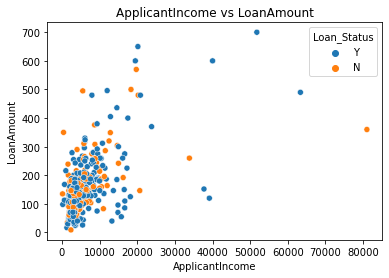

In [79]:
sns.scatterplot(df.ApplicantIncome, df.LoanAmount,hue=df.Loan_Status)
plt.title('ApplicantIncome vs LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

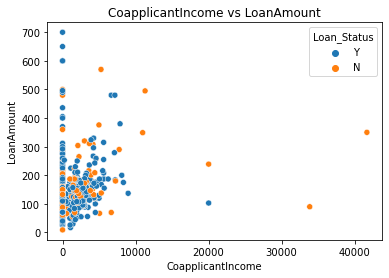

In [80]:
sns.scatterplot(df.CoapplicantIncome, df.LoanAmount,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs LoanAmount')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

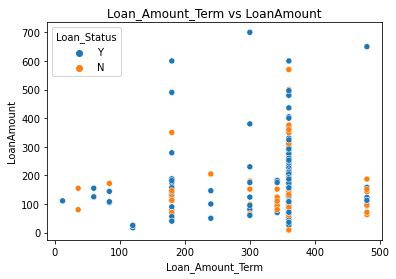

In [81]:
sns.scatterplot(df.Loan_Amount_Term, df.LoanAmount,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs LoanAmount')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

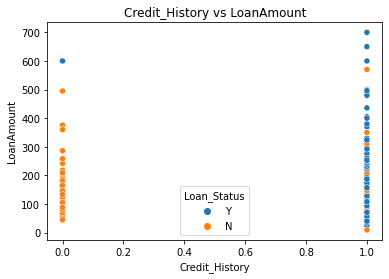

In [82]:
sns.scatterplot(df.Credit_History, df.LoanAmount,hue=df.Loan_Status)
plt.title('Credit_History vs LoanAmount')
plt.xlabel('Credit_History')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'Loan_Amount_Term')

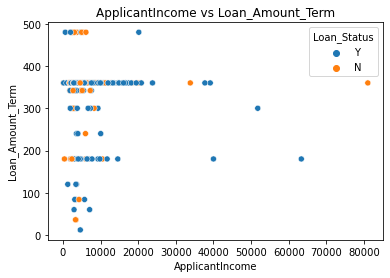

In [83]:
sns.scatterplot(df.ApplicantIncome, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('ApplicantIncome vs Loan_Amount_Term')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

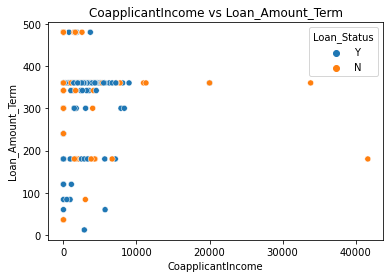

In [84]:
sns.scatterplot(df.CoapplicantIncome, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs Loan_Amount_Term')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

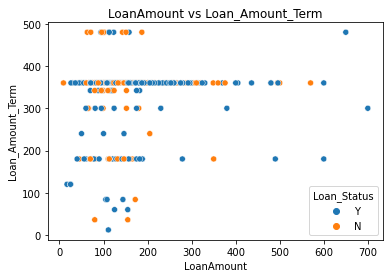

In [85]:
sns.scatterplot(df.LoanAmount, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('LoanAmount vs Loan_Amount_Term')
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

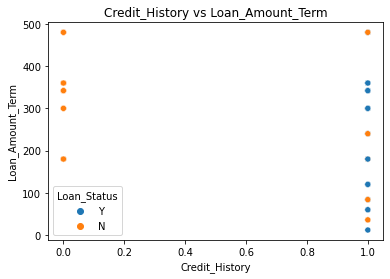

In [86]:
sns.scatterplot(df.Credit_History, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('Credit_History vs Loan_Amount_Term')
plt.xlabel('Credit_History')
plt.ylabel('Loan_Amount_Term')

Categorical vs Numerical

In [87]:
cat_var = df.select_dtypes(include=['O'])
cat_var.drop(['Loan_Status'],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


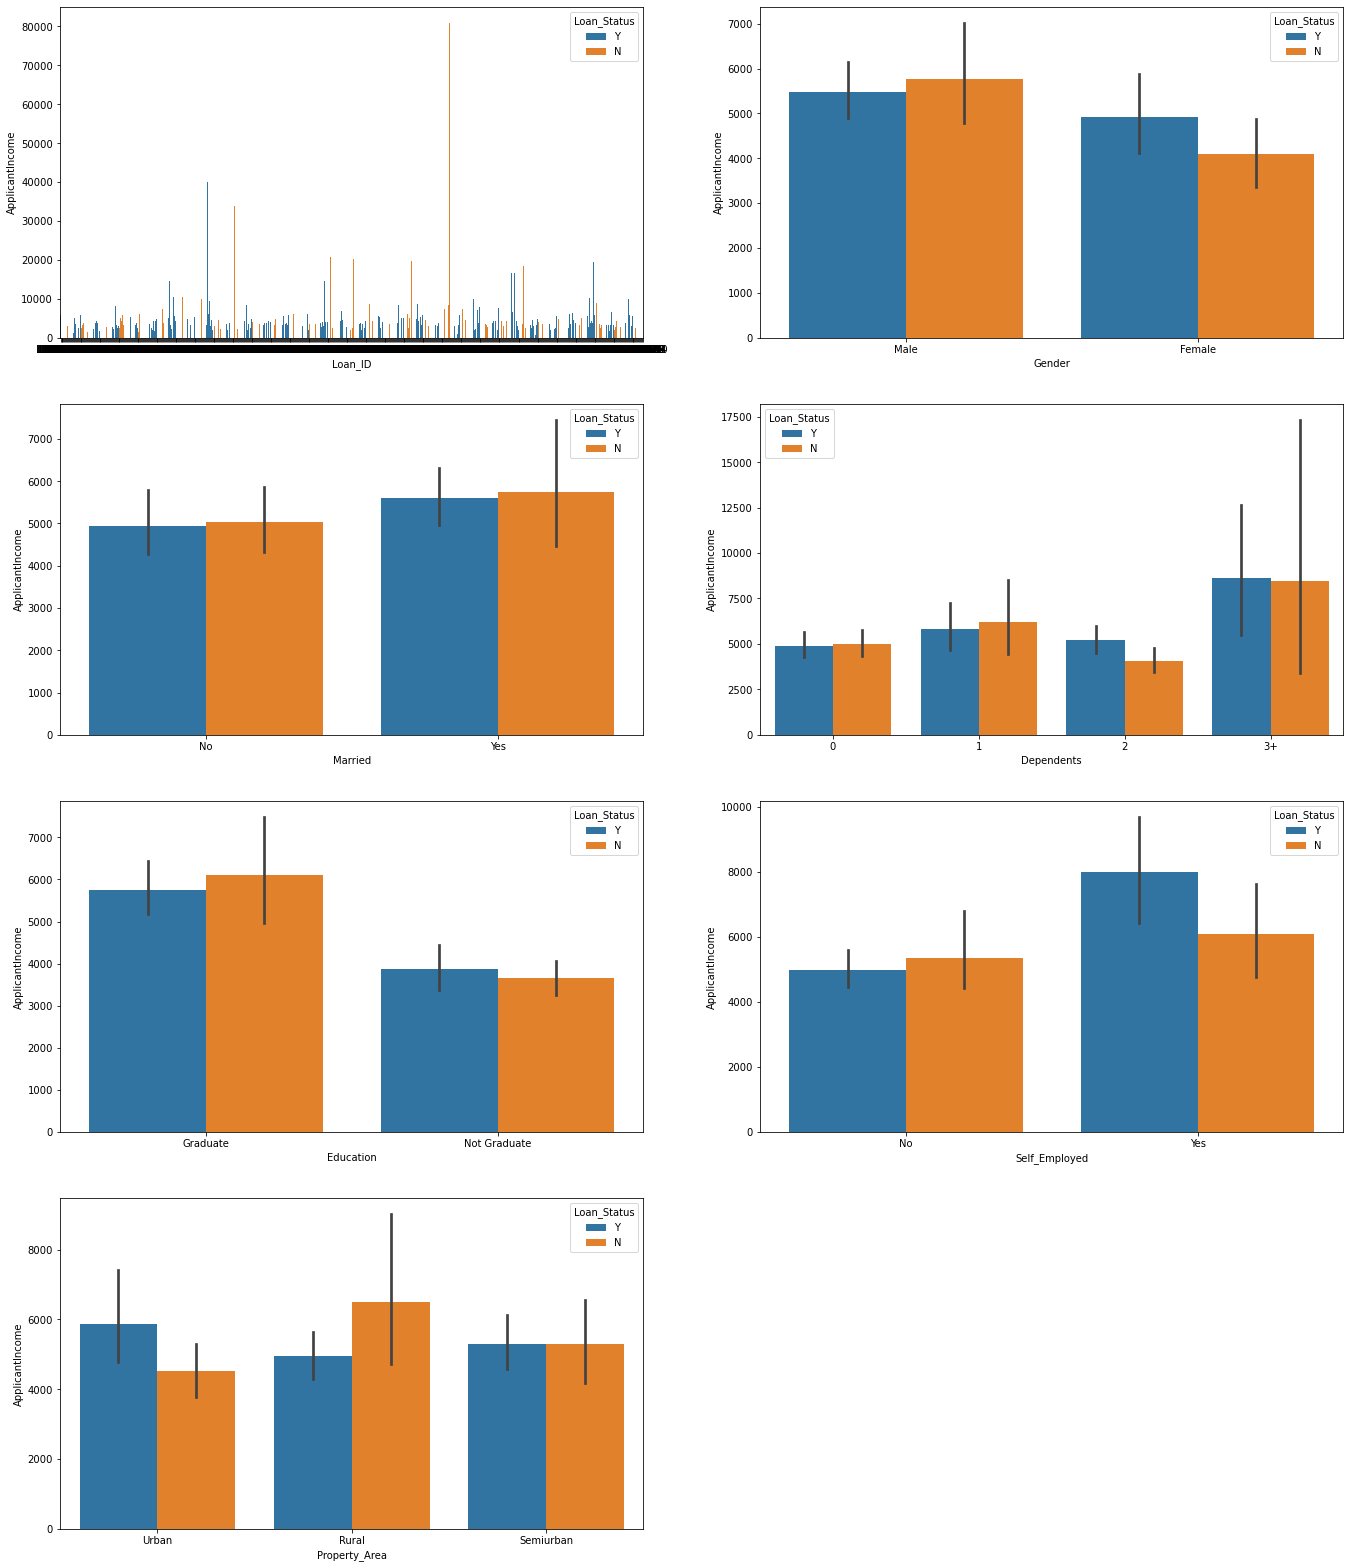

In [88]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['ApplicantIncome'],hue=df['Loan_Status'])
    plot += 1
plt.show()

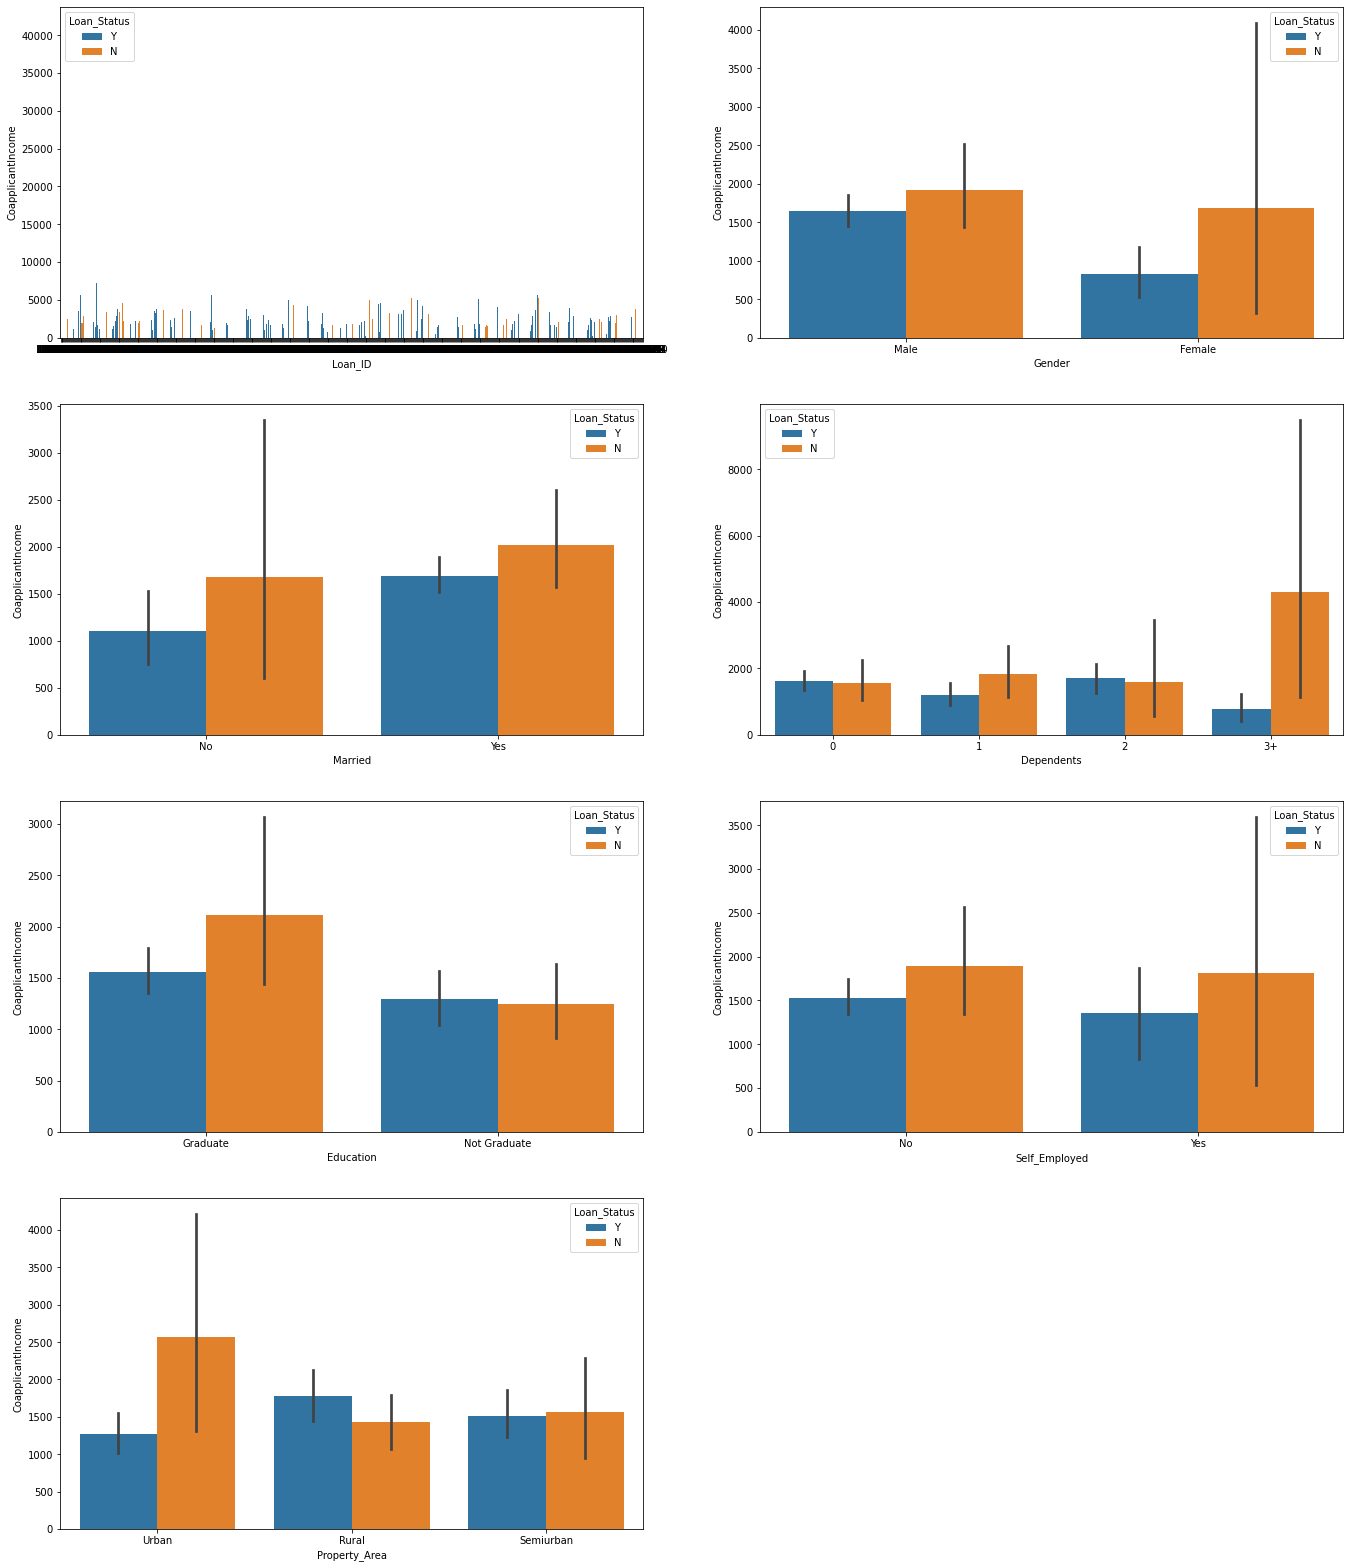

In [89]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['CoapplicantIncome'],hue=df['Loan_Status'])
    plot += 1
plt.show()

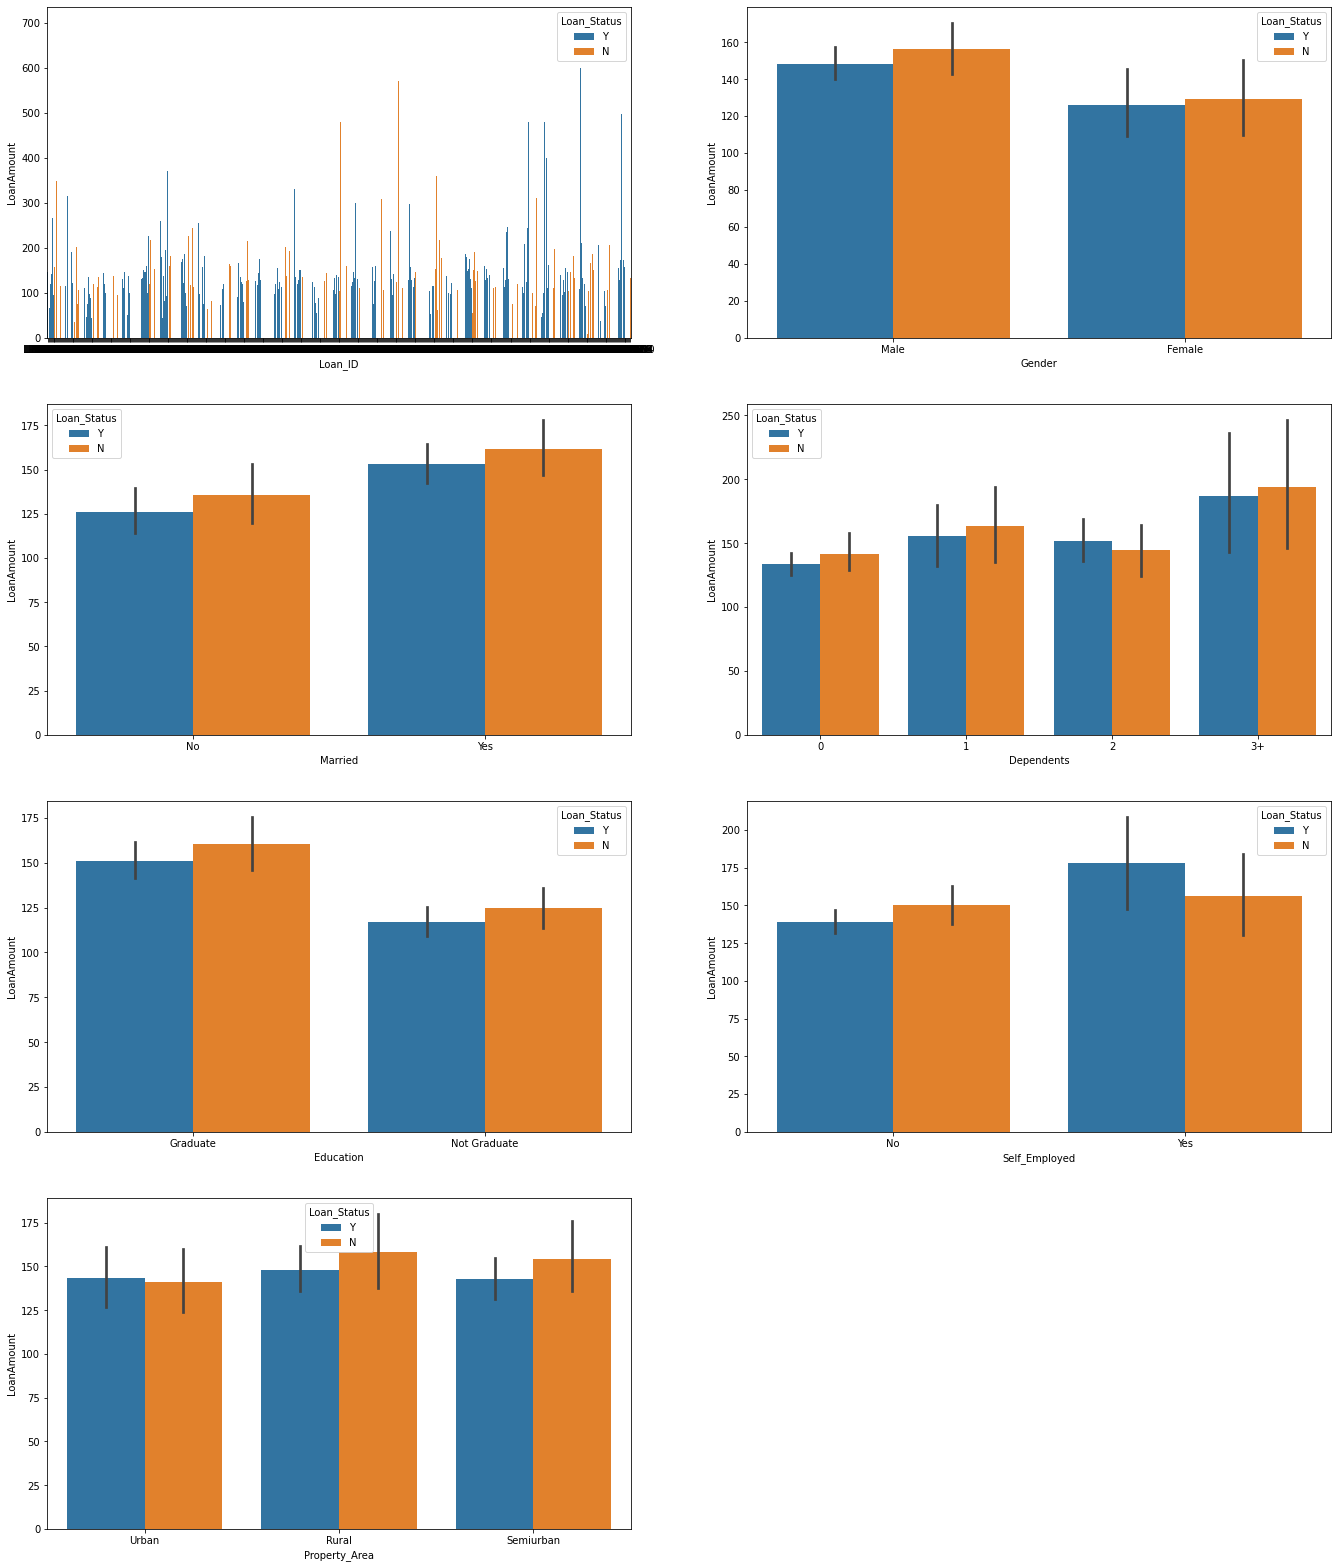

In [90]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['LoanAmount'],hue=df['Loan_Status'])
    plot += 1
plt.show()

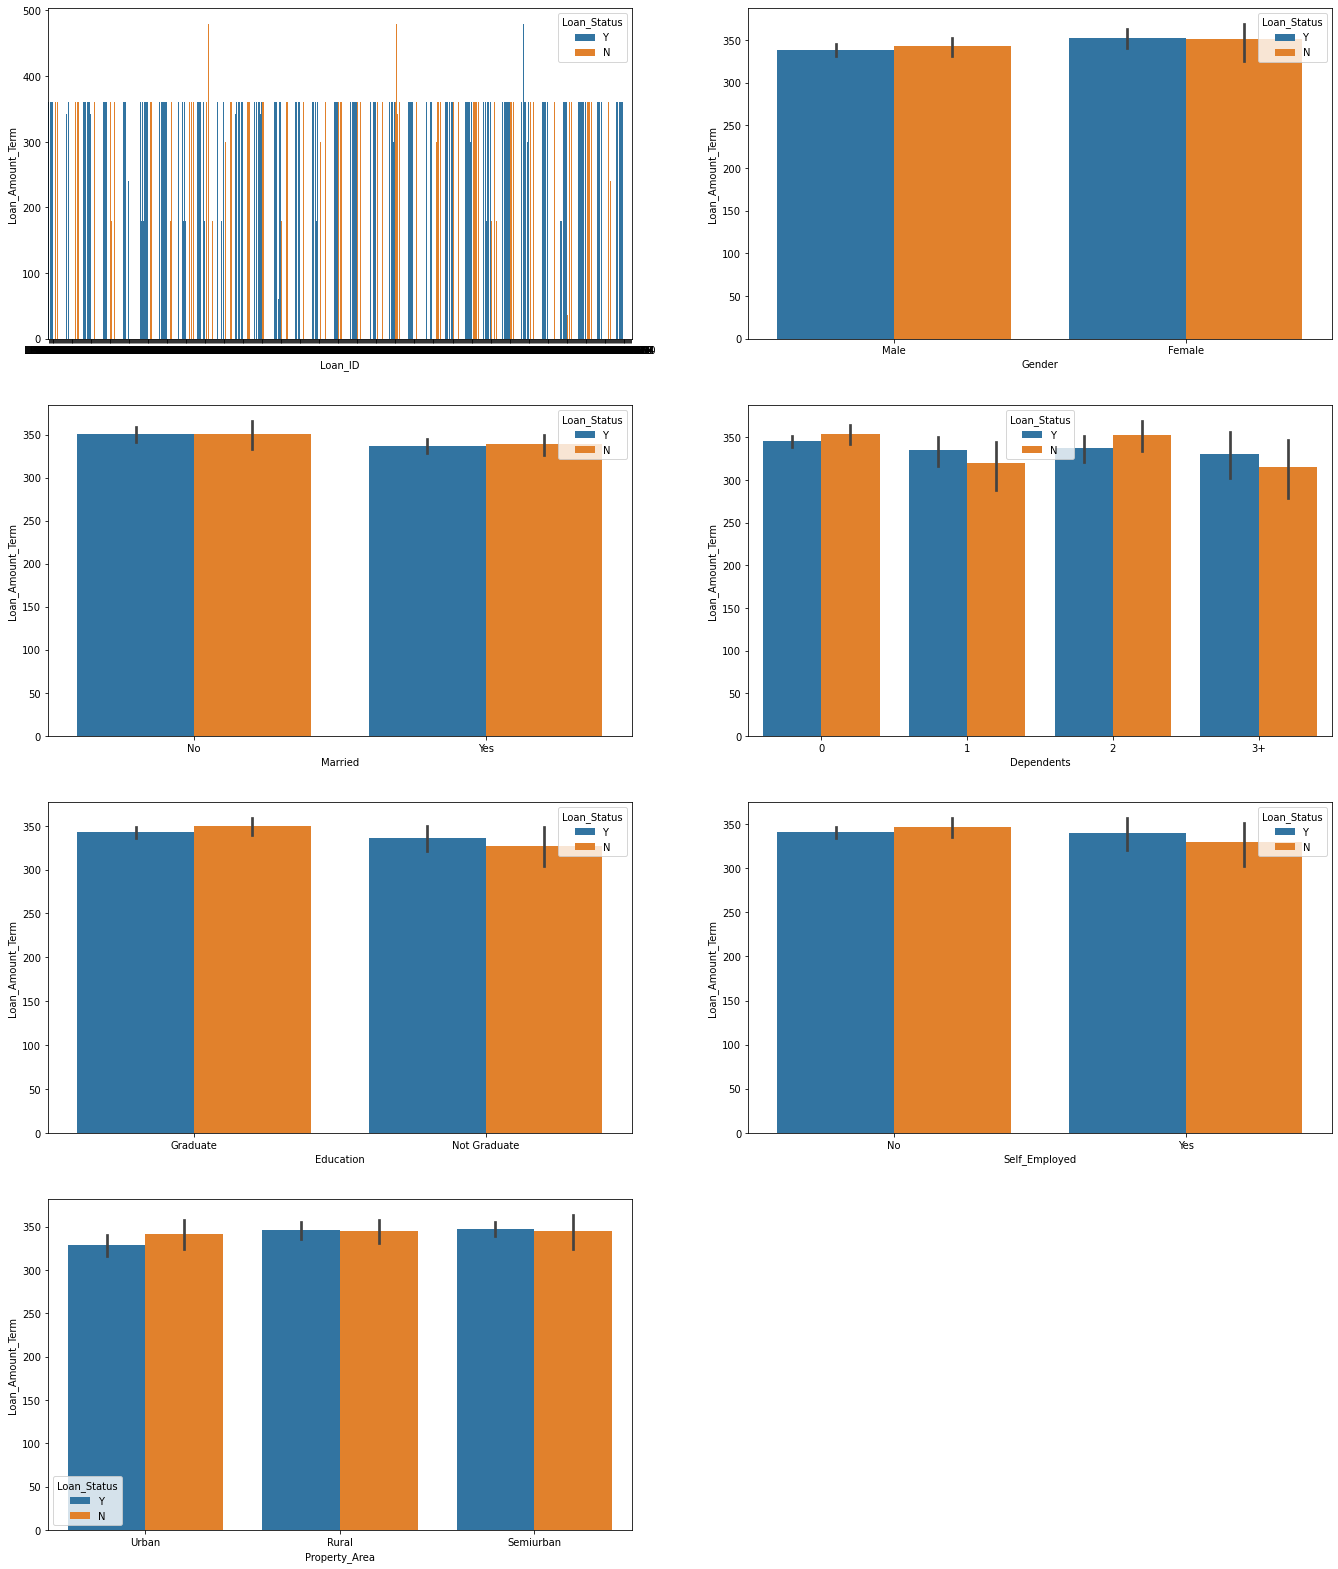

In [91]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['Loan_Amount_Term'],hue=df['Loan_Status'])
    plot += 1
plt.show()

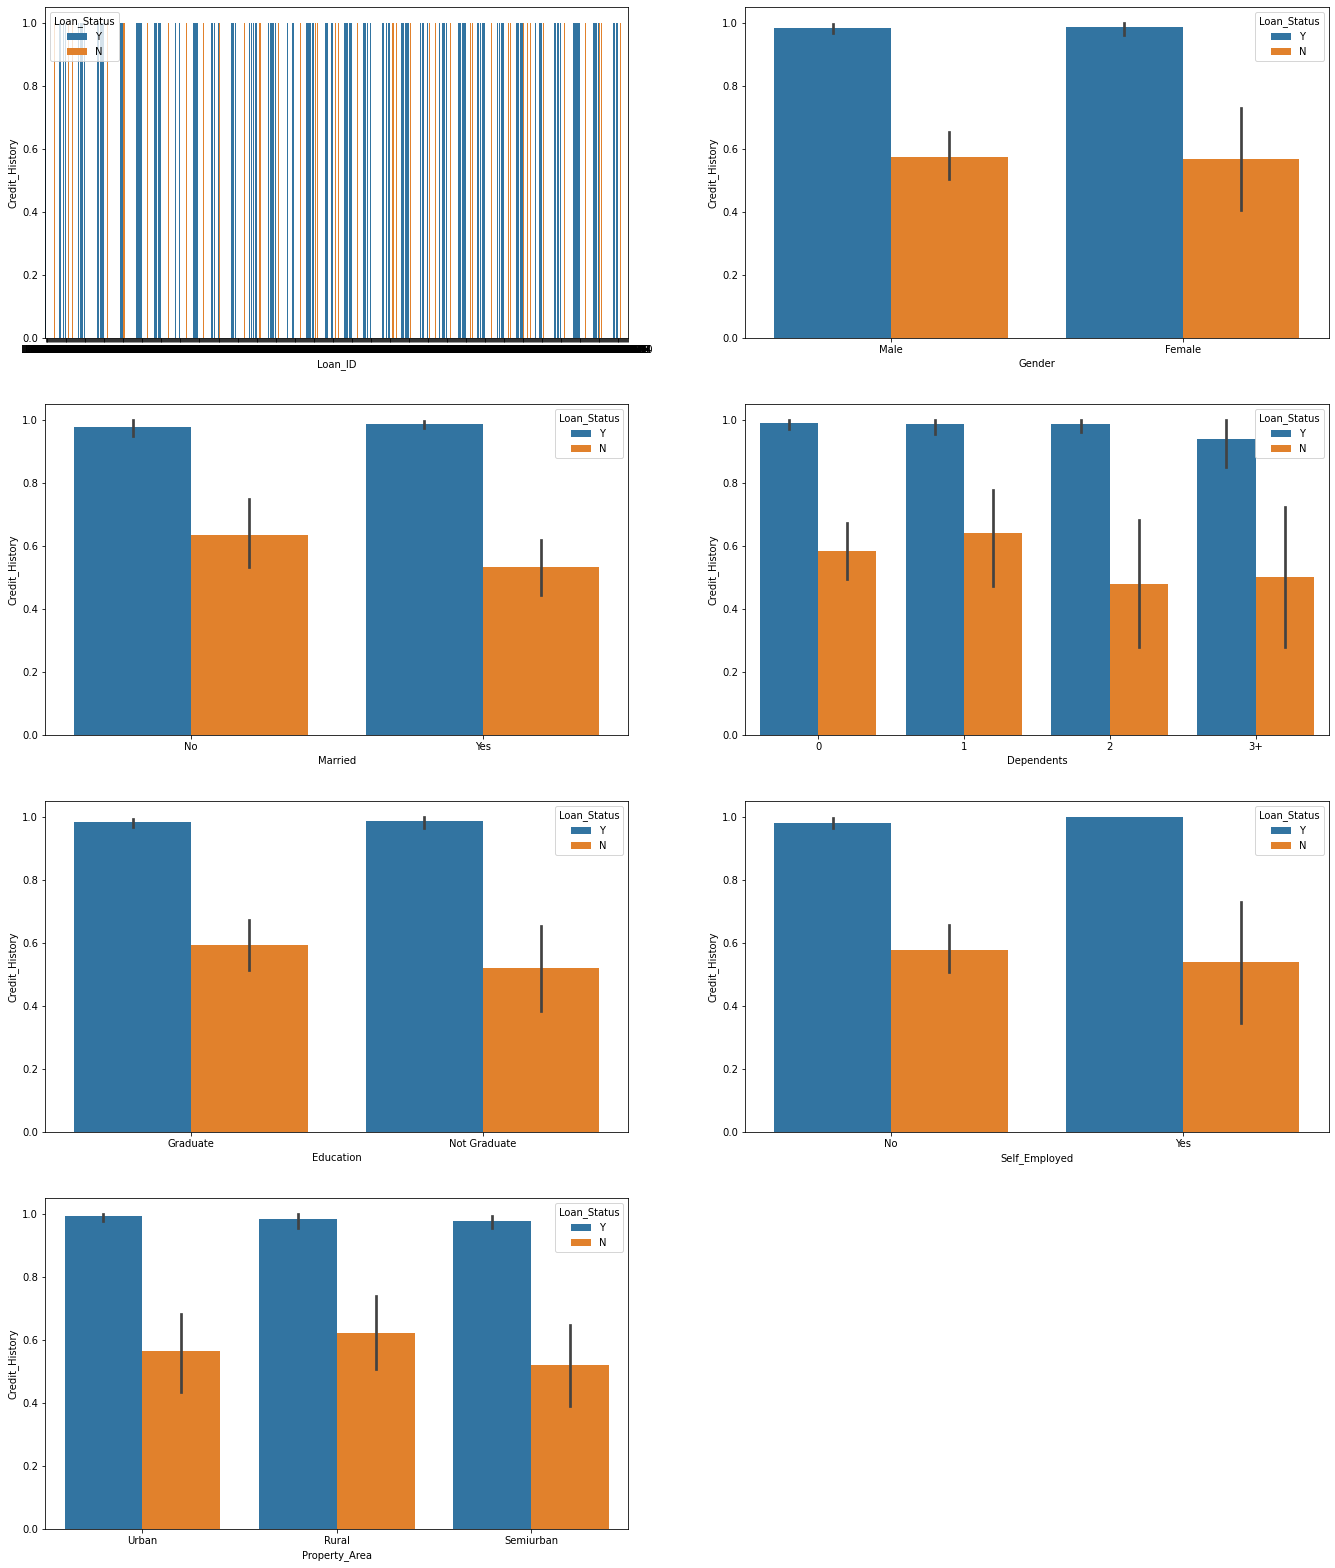

In [92]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['Credit_History'],hue=df['Loan_Status'])
    plot += 1
plt.show()

Here I have completed the visualization part.

Now I will check if they are any outliers present or not.

In [93]:
numerical_variables = df.select_dtypes(include=['number'])

numerical_variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


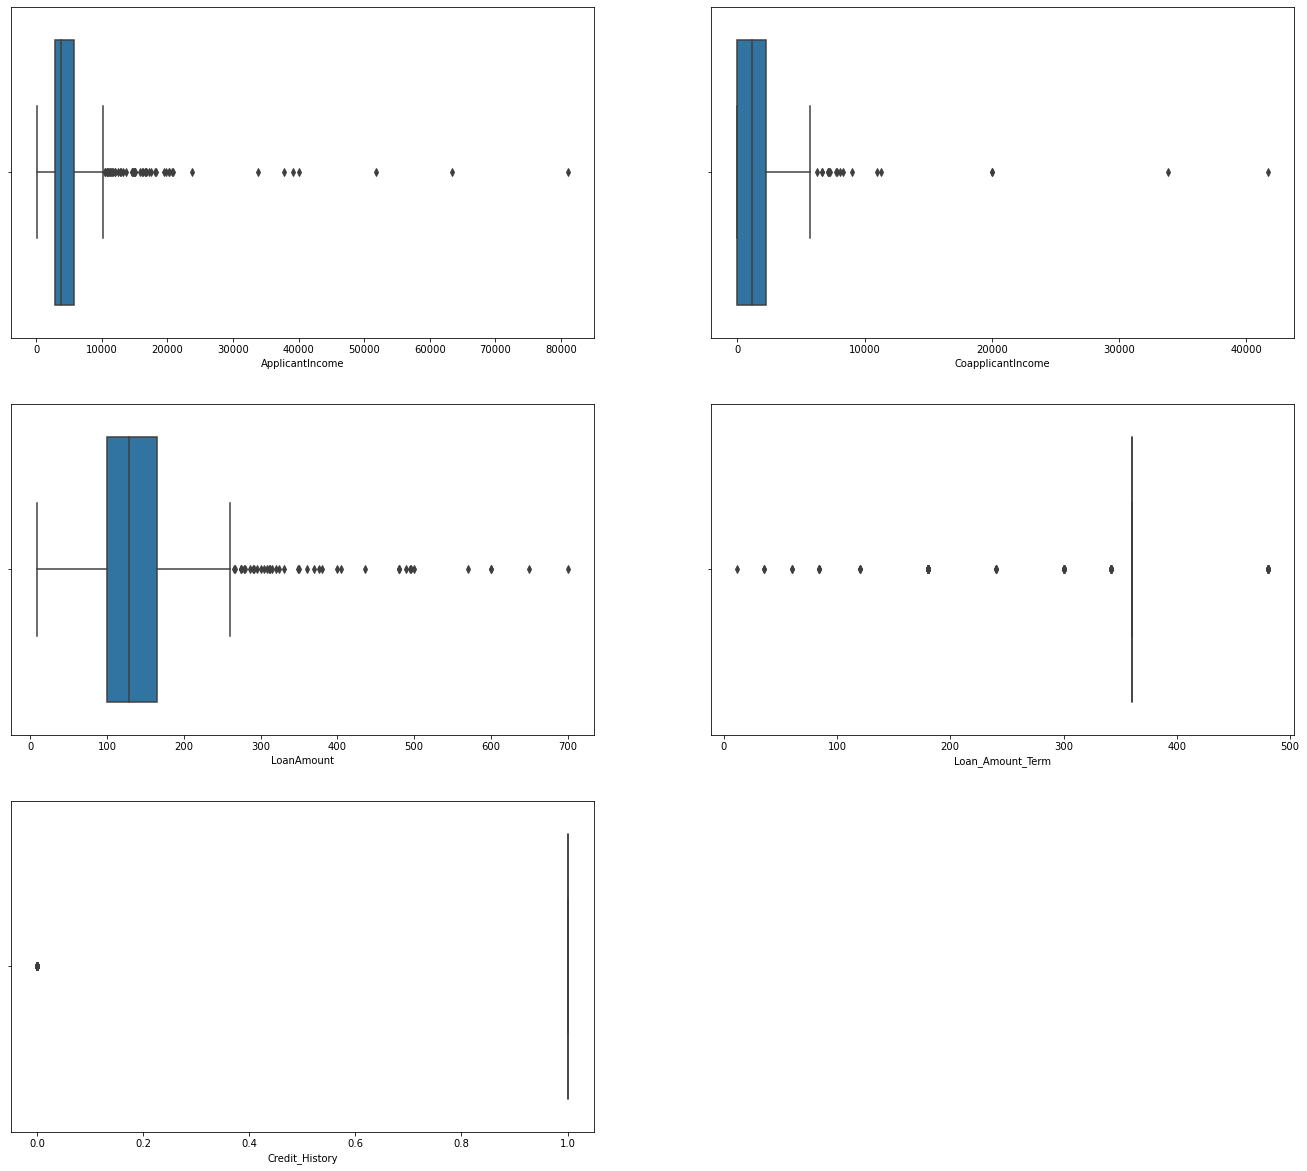

In [94]:
plt.figure(figsize=(23,28))
plot = 1
for i in numerical_variables:
    if plot < 6:
        ax = plt.subplot(4,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

Applicant Income

In [95]:
print(df['ApplicantIncome'].quantile(0.10))
print(df['ApplicantIncome'].quantile(0.90))

2216.1
9459.900000000007


In [96]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > 9459.900000000007,9459.900000000007,df['ApplicantIncome'])


<AxesSubplot:xlabel='ApplicantIncome'>

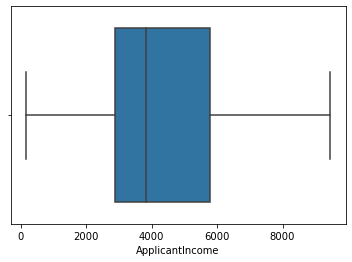

In [97]:
sns.boxplot(df['ApplicantIncome'])

Co Applicant Income

In [98]:
print(df['CoapplicantIncome'].quantile(0.10))
print(df['CoapplicantIncome'].quantile(0.90))

0.0
3782.200000000002


In [99]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > 3782.200000000002,3782.200000000002,df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

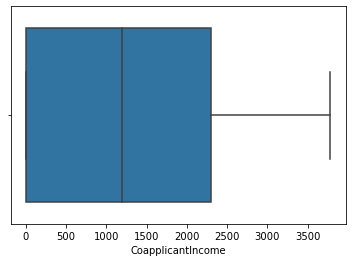

In [100]:
sns.boxplot(df['CoapplicantIncome'])

Loan Amount

In [101]:
print(df['LoanAmount'].quantile(0.10))
print(df['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [102]:
df['LoanAmount'] = np.where(df['LoanAmount'] > 229.4000000000001,229.4000000000001,df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

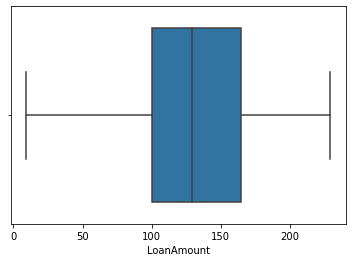

In [103]:
sns.boxplot(df['LoanAmount'])

Loan Amount Term

In [104]:
print(df['Loan_Amount_Term'].quantile(0.10))
print(df['Loan_Amount_Term'].quantile(0.90))

300.0
360.0


In [105]:
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] > 360.0,360.0,df['Loan_Amount_Term'])
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] < 300.0,300.0,df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

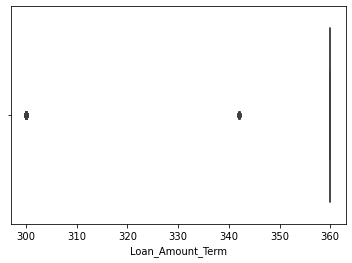

In [106]:
sns.boxplot(df['Loan_Amount_Term'])

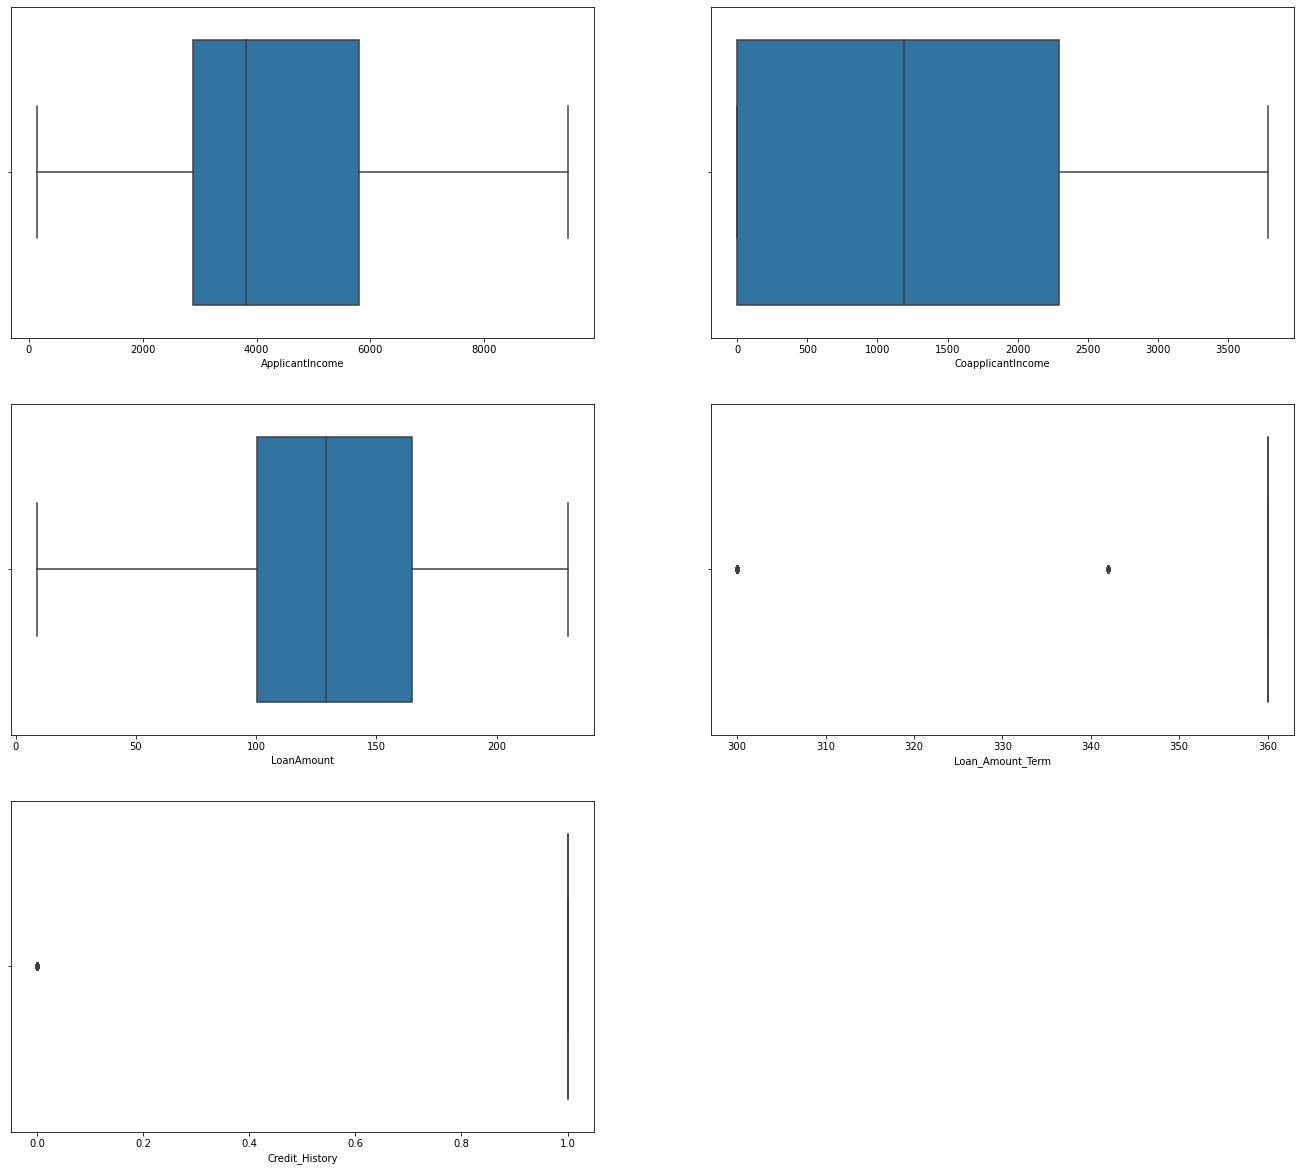

In [107]:
plt.figure(figsize=(23,28))
plot = 1
for i in numerical_variables:
    if plot < 6:
        ax = plt.subplot(4,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

Check for skewness

In [108]:
df.skew()

ApplicantIncome      0.910711
CoapplicantIncome    0.518499
LoanAmount           0.291910
Loan_Amount_Term    -2.289653
Credit_History      -2.021971
dtype: float64

# Encoding Technique

In [109]:
cat_var

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [110]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [111]:
for feature in cat_var:
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [112]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


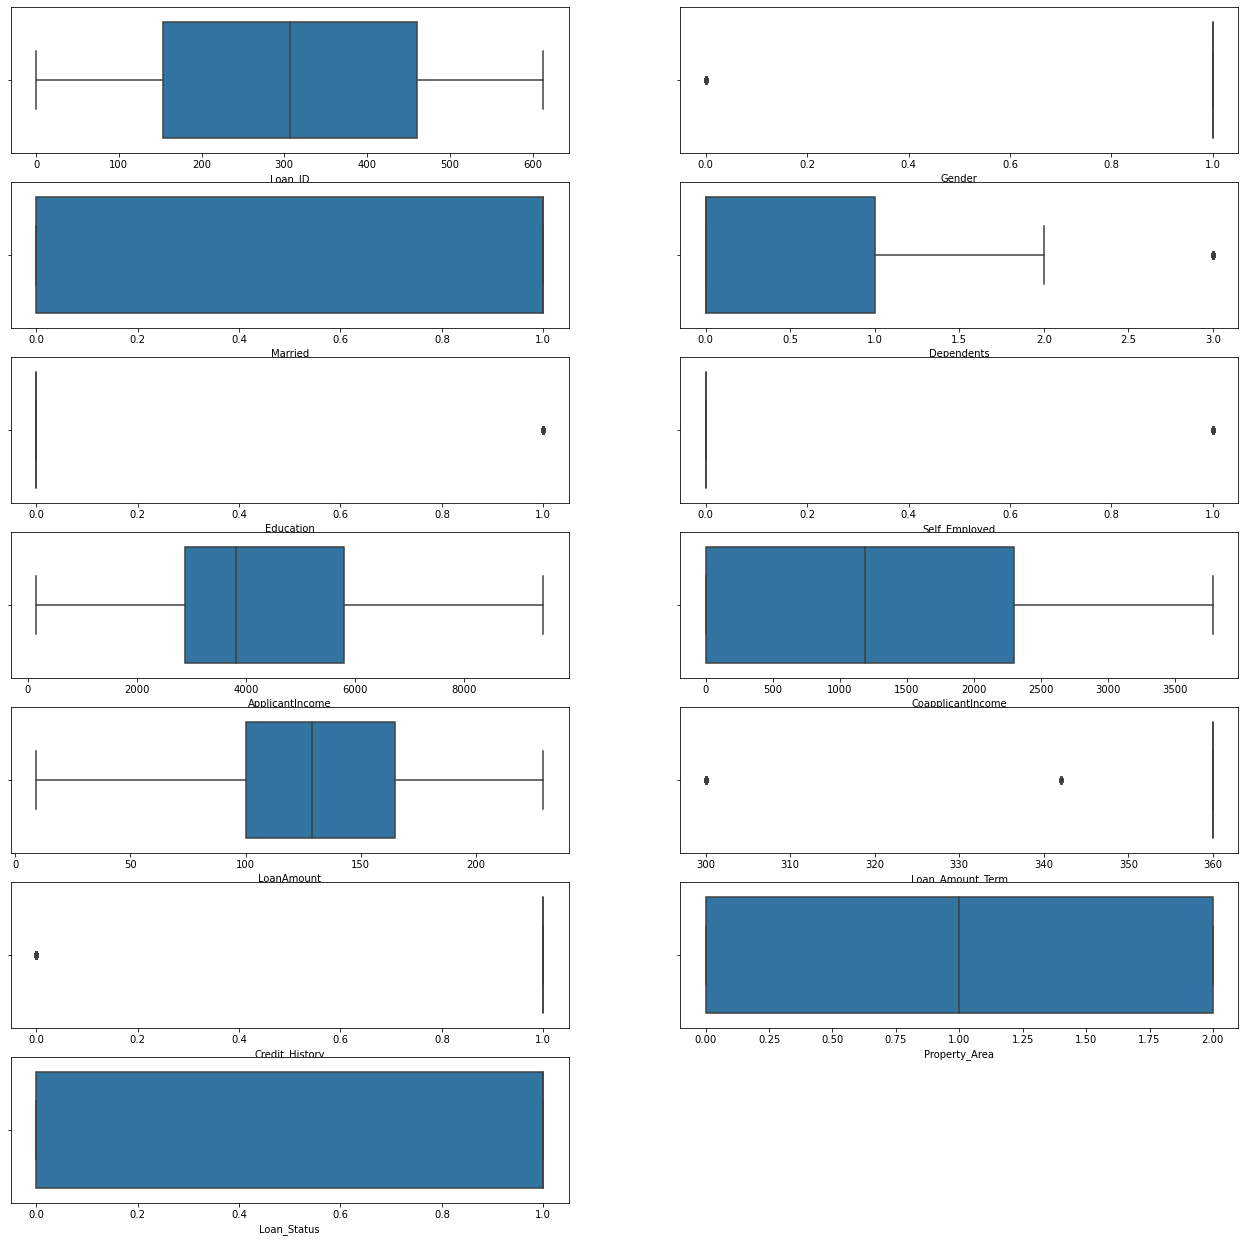

In [113]:
plt.figure(figsize=(22,22))
plot = 1
for i in df:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

# Correlation Matrix

In [114]:
df_corr = df.corr()

df_corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.020712,-0.032492,0.033404,-0.014277,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.070402,0.201686,0.153079,-0.080408,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.021912,0.246074,0.185138,-0.097941,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.115117,-0.048894,0.156962,-0.103267,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.203043,-0.026588,-0.166021,-0.096698,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.235941,-0.048357,0.114334,-0.033813,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.020712,0.070402,0.021912,0.115117,-0.203043,0.235941,1.000000,-0.279920,0.543567,-0.023749,0.035898,-0.034496,0.001416
CoapplicantIncome,-0.032492,0.201686,0.246074,-0.048894,-0.026588,-0.048357,-0.279920,1.000000,0.237311,-0.017590,-0.007534,-0.078069,0.021877
LoanAmount,0.033404,0.153079,0.185138,0.156962,-0.166021,0.114334,0.543567,0.237311,1.000000,0.075739,-0.001170,-0.083367,-0.049528
Loan_Amount_Term,-0.014277,-0.080408,-0.097941,-0.103267,-0.096698,-0.033813,-0.023749,-0.017590,0.075739,1.000000,0.051503,-0.089423,0.017978


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

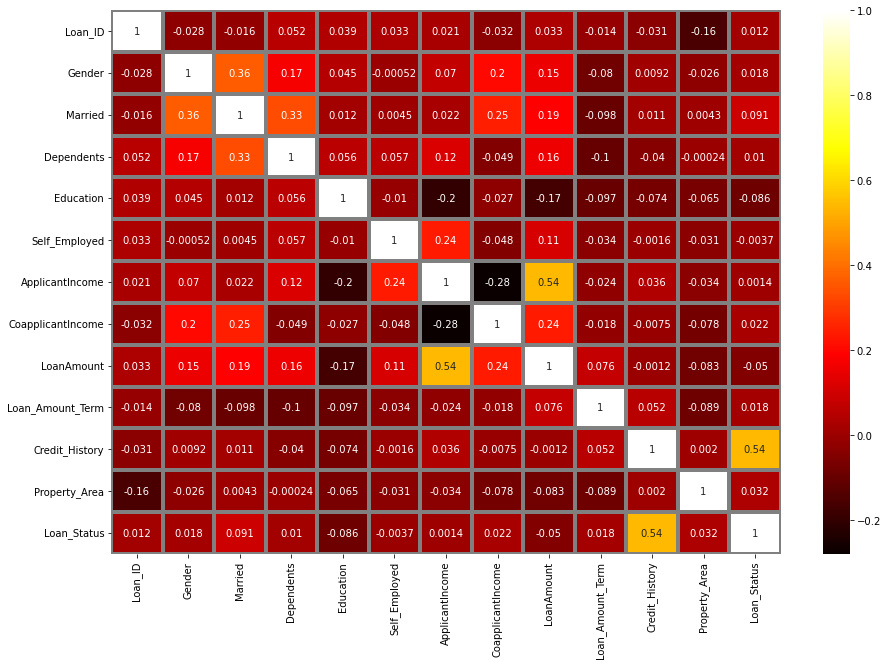

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,linecolor='grey',linewidths=4,cmap='hot')
plt.tight_layout

In [116]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.910711
CoapplicantIncome    0.518499
LoanAmount           0.291910
Loan_Amount_Term    -2.289653
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

I will tune the skewness part in the latter stages 

From the above skewness part I will drop Loan_ID because it is not contibuting to our model.

In [117]:
#Dropping unvalid column
df = df.drop(['Loan_ID'],axis=1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


# Target Variable

Here the target variable is Loan Status.I will check the distribution of the target variable.

In [118]:
print(df['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

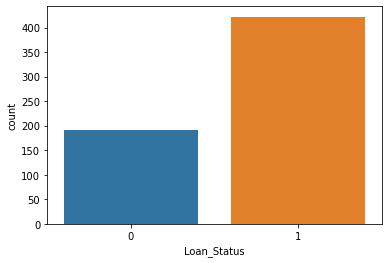

In [119]:
sns.countplot(df['Loan_Status'])

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [120]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [121]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2


In [122]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

Now I will use Power Transformer to reduce the skewness part.

# Power Transfomer

In [123]:
from sklearn.preprocessing import PowerTransformer

In [124]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.700545,-1.107662,0.276914,0.405867,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.201818,0.774281,-0.085411,0.405867,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.594428,-1.107662,-1.448537,0.405867,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.855792,0.923705,-0.247675,0.405867,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.754465,-1.107662,0.171914,0.405867,0.411733,1.193567


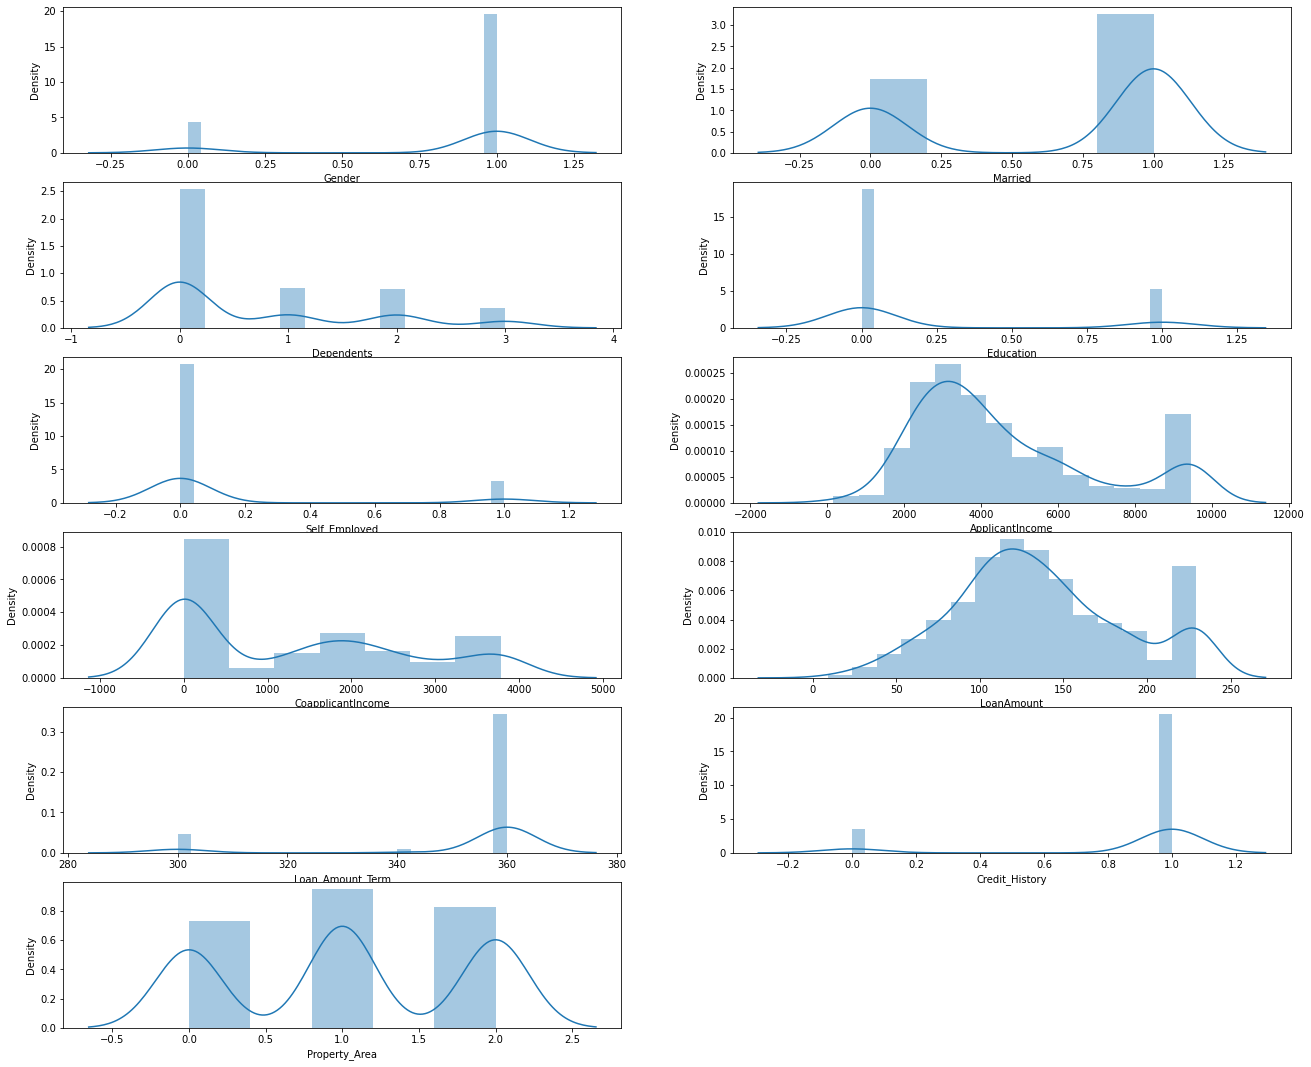

In [125]:
plt.figure(figsize=(22,22))
plot = 1
for i in X:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

# VIF

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.206601,Gender
1,1.419082,Married
2,1.191312,Dependents
3,1.079097,Education
4,1.052362,Self_Employed
5,1.961794,ApplicantIncome
6,1.609880,CoapplicantIncome
7,1.665492,LoanAmount
8,1.060686,Loan_Amount_Term
9,1.014734,Credit_History


All the values are below 10,So there is no multicollinearity

Now I will normalize the values using Standard Scaler

# Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.700545,-1.107662,0.276914,0.405867,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.201818,0.774281,-0.085411,0.405867,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.594428,-1.107662,-1.448537,0.405867,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.855792,0.923705,-0.247675,0.405867,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.754465,-1.107662,0.171914,0.405867,0.411733,1.193567


# Converting an Imbalanced Dataset to Balanced Dataset

In [128]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
# adding samples to make all the categorical quality values same

oversample = SMOTE(0.85)
X_scaled, Y = oversample.fit_resample(X_scaled, Y)

In [131]:
Y.value_counts()

1    422
0    358
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

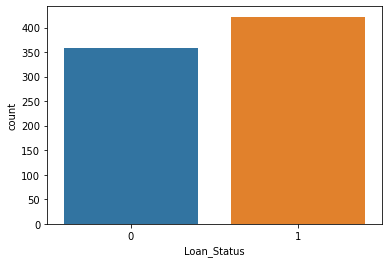

In [132]:
sns.countplot(Y)

Now I will proceed to Model Building part

# Model Building

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit,StratifiedKFold

Data

In [134]:
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.700545,-1.107662,0.276914,0.405867,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.201818,0.774281,-0.085411,0.405867,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.594428,-1.107662,-1.448537,0.405867,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.855792,0.923705,-0.247675,0.405867,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.754465,-1.107662,0.171914,0.405867,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
775,0.472343,0.728816,0.908239,-0.528362,-0.392601,-0.557235,0.735292,-0.201329,0.405867,-2.428760,0.002361
776,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,-0.196776,-0.573279,-0.002830,0.405867,0.411733,0.002361
777,-1.455901,0.728816,-0.827104,-0.528362,-0.392601,0.035248,-1.107662,-0.123452,0.405867,0.411733,-1.350003
778,0.472343,-0.549795,-0.827104,1.892641,-0.392601,-0.621673,-0.248719,-0.570468,-2.512639,0.411733,0.468599


In [135]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
775    0
776    0
777    0
778    0
779    0
Name: Loan_Status, Length: 780, dtype: int32

# 1]Logistic Regression

Finding the best random state for our model

In [136]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test, y_lr)
    
    if accuracy_lr>maxAccuracy:
        maxAccuracy=accuracy_lr
        maxRandomState=i

print("Best accuracy score is", accuracy_lr ," on Random State", maxRandomState)

Best accuracy score is 0.6717948717948717  on Random State 38


In [137]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=84)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("-----------------------------------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

print("-----------------------------------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("-----------------------------------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  71.28205128205128
-----------------------------------------------------------------------
[0.69871795 0.74358974 0.75       0.69230769 0.71153846]
Cross Validation Score :  0.7192307692307693
-----------------------------------------------------------------------
[[ 39  45]
 [ 11 100]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.46      0.58        84
           1       0.69      0.90      0.78       111

    accuracy                           0.71       195
   macro avg       0.73      0.68      0.68       195
weighted avg       0.73      0.71      0.70       195



In [138]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.73717949 0.71794872 0.80769231 0.76282051 0.39102564]
--------------------------------------------------
K-Fold Cross Validation Score :  68.33333333333333


In [139]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
l3 = cross_val_score(lr,X_scaled,Y,cv=Stra_K_fold)
print(l3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",l3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.69871795 0.74358974 0.75       0.69230769 0.71153846]
--------------------------------------------------------
Stratified K Fold :  71.92307692307693


In [140]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(l2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",l2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.6974359  0.68717949 0.68205128 0.6974359  0.6974359 ]
--------------------------------------------------
 Stratified Shuffle Split :  69.23076923076923


plotting confusion matrix

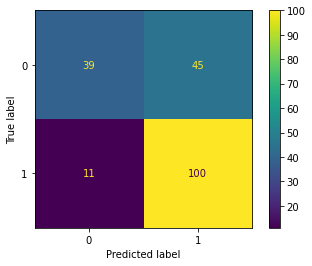

In [141]:
plot_confusion_matrix(lr,x_test,y_test)

Roc Curve

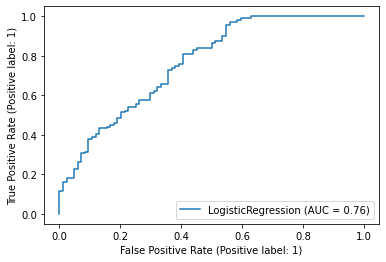

In [142]:
plot_roc_curve(lr,x_test,y_test)

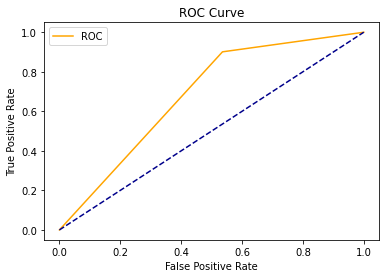

0.6825933075933076

In [143]:
fpr,tpr ,thresholds = roc_curve(y_test,y_lr)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_lr)
auc_score

# 2]KNN

Finding the best random state for the model

In [144]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8  on Random State 70


Accuracy score :  74.87179487179488
---------------------------------------------
[0.67307692 0.75       0.70512821 0.78846154 0.76282051]
Cross Validation Score :  0.7358974358974358
---------------------------------------------
[[63 22]
 [27 83]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        85
           1       0.79      0.75      0.77       110

    accuracy                           0.75       195
   macro avg       0.75      0.75      0.75       195
weighted avg       0.75      0.75      0.75       195



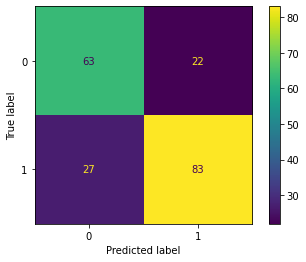

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=27)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

#Confusion Matrix Plot
print(plot_confusion_matrix(knn,x_test,y_test))

In [146]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.68589744 0.71794872 0.72435897 0.70512821 0.51282051]
--------------------------------------------------
K-Fold Cross Validation Score :  66.92307692307693


In [147]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
k3 = cross_val_score(knn,X_scaled,Y,cv=Stra_K_fold)
print(k3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",k3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.67307692 0.75       0.70512821 0.78846154 0.76282051]
--------------------------------------------------------
Stratified K Fold :  73.58974358974358


In [148]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.6974359  0.68205128 0.72307692 0.75897436 0.75897436]
--------------------------------------------------
 Stratified Shuffle Split :  72.41025641025641


Roc Curve

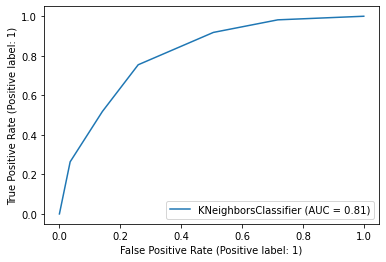

In [149]:
plot_roc_curve(knn,x_test,y_test)

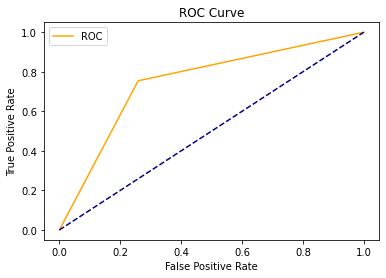

74.78609625668449

In [150]:
fpr,tpr ,thresholds = roc_curve(y_test,y_knn)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_knn)
auc_score*100

# 3]Decision Tree

Finding the best random state for our model

In [151]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7948717948717948  on Random State 75


Accuracy score :  67.6923076923077
---------------------------------------------
[0.72435897 0.77564103 0.70512821 0.78205128 0.75641026]
Cross Validation Score :  0.7487179487179487
---------------------------------------------
[[58 30]
 [33 74]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        88
           1       0.71      0.69      0.70       107

    accuracy                           0.68       195
   macro avg       0.67      0.68      0.67       195
weighted avg       0.68      0.68      0.68       195



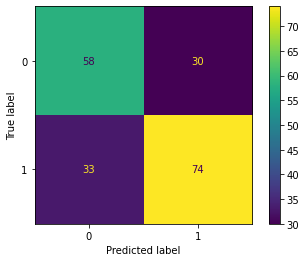

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=19)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

#PLot Confusion Matrix
print(plot_confusion_matrix(dt,x_test,y_test))

In [153]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.78205128 0.66666667 0.76282051 0.67948718 0.69871795]
--------------------------------------------------
K-Fold Cross Validation Score :  71.79487179487181


In [154]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
d3 = cross_val_score(dt,X_scaled,Y,cv=Stra_K_fold)
print(d3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",d3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.70512821 0.78205128 0.70512821 0.77564103 0.71153846]
--------------------------------------------------------
Stratified K Fold :  73.58974358974359


In [155]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
d2 = cross_val_score(dt,X_scaled,Y,cv=Stratified_Shuffle)
print(d2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",d2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.73504274 0.75213675 0.69230769 0.73931624 0.73076923]
--------------------------------------------------
 Stratified Shuffle Split :  72.991452991453


Roc Curve

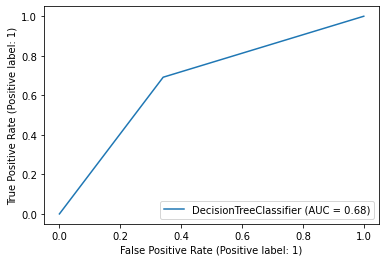

In [156]:
plot_roc_curve(dt,x_test,y_test)

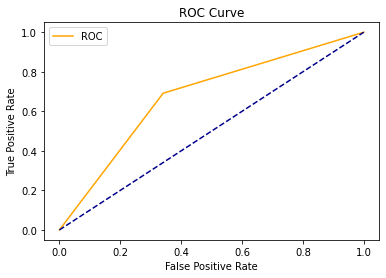

67.5339847068819

In [157]:
fpr,tpr ,thresholds = roc_curve(y_test,y_dt)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_dt)
auc_score*100

# 4]Support Vector Machine

Finding the best random state for our model

In [158]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy_svc = accuracy_score(y_test, y_svc)
    
    if accuracy_svc>maxAccuracy:
        maxAccuracy=accuracy_svc
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8102564102564103  on Random State 69


Accuracy score :  76.92307692307693
---------------------------------------------
[0.71794872 0.73717949 0.73717949 0.73717949 0.78205128]
Cross Validation Score :  0.7423076923076923
---------------------------------------------
[[ 46  36]
 [  9 104]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.56      0.67        82
           1       0.74      0.92      0.82       113

    accuracy                           0.77       195
   macro avg       0.79      0.74      0.75       195
weighted avg       0.78      0.77      0.76       195



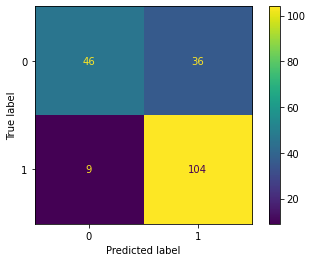

In [159]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=3)

#training our model
svc=SVC()
svc.fit(x_train, y_train)

#Predicting y_test
y_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_svc)

#Accuracy Score
print("Accuracy score : ", accuracy_svc*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_svc = cross_val_score(svc,X_scaled,Y,cv=5)
print(cross_val_svc)
print("Cross Validation Score : ",cross_val_svc.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_svc))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_svc))

#Plot Confusion Matrix
print(plot_confusion_matrix(svc,x_test,y_test))

In [160]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
s1 = cross_val_score(svc,X_scaled,Y,cv=K_fold)
print(s1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , s1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.71153846 0.76923077 0.83333333 0.77564103 0.3974359 ]
--------------------------------------------------
K-Fold Cross Validation Score :  69.74358974358974


In [161]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
s3 = cross_val_score(svc,X_scaled,Y,cv=Stra_K_fold)
print(s3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",s3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.71794872 0.73717949 0.73717949 0.73717949 0.78205128]
--------------------------------------------------------
Stratified K Fold :  74.23076923076923


In [162]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
s2 = cross_val_score(svc,X_scaled,Y,cv=Stratified_Shuffle)
print(s2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",s2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.75384615 0.73846154 0.74871795 0.72307692 0.74358974]
--------------------------------------------------
 Stratified Shuffle Split :  74.15384615384616


Roc Curve

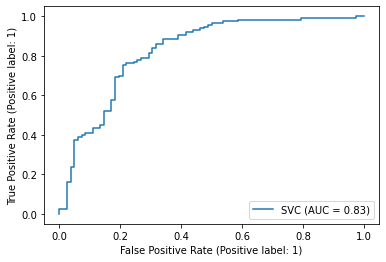

In [163]:
plot_roc_curve(svc,x_test,y_test)

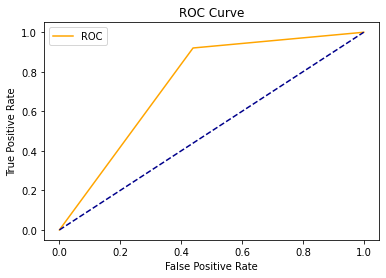

74.06647960284913

In [164]:
fpr,tpr ,thresholds = roc_curve(y_test,y_svc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_svc)
auc_score*100

# 5]Random Forest

In [165]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8615384615384616  on Random State 84


Accuracy score :  83.58974358974359
---------------------------------------------
[0.75       0.80128205 0.76282051 0.85897436 0.85897436]
Cross Validation Score :  0.8064102564102564
---------------------------------------------
[[ 60  24]
 [  8 103]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        84
           1       0.81      0.93      0.87       111

    accuracy                           0.84       195
   macro avg       0.85      0.82      0.83       195
weighted avg       0.84      0.84      0.83       195



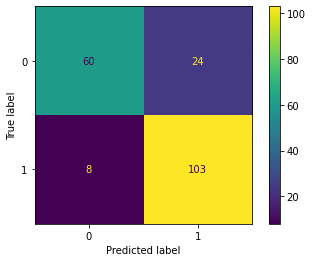

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=84)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

#Plot Confusion Matrix
print(plot_confusion_matrix(rf,x_test,y_test))

In [167]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.80128205 0.76282051 0.78846154 0.75641026 0.67948718]
--------------------------------------------------
K-Fold Cross Validation Score :  75.76923076923077


In [168]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
r3 = cross_val_score(rf,X_scaled,Y,cv=Stra_K_fold)
print(r3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",r3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.73076923 0.81410256 0.78205128 0.8525641  0.86538462]
--------------------------------------------------------
Stratified K Fold :  80.8974358974359


In [169]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",r2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.82564103 0.76923077 0.83076923 0.78461538 0.84102564]
--------------------------------------------------
 Stratified Shuffle Split :  81.02564102564102


Roc Curve

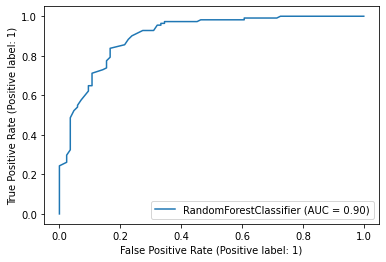

In [170]:
plot_roc_curve(rf,x_test,y_test)

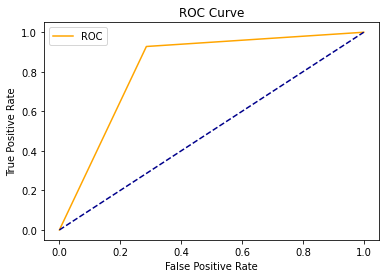

82.1106821106821

In [171]:
fpr,tpr ,thresholds = roc_curve(y_test,y_rf)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_rf)
auc_score*100

# 6]Gradient Boost

Finding the best random state for our model

In [172]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy_gb = accuracy_score(y_test, y_gb)
    
    if accuracy_gb>maxAccuracy:
        maxAccuracy=accuracy_gb
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8512820512820513  on Random State 52


Accuracy score :  79.48717948717949
---------------------------------------------
[0.71153846 0.75       0.75       0.76923077 0.82051282]
Cross Validation Score :  0.7602564102564102
---------------------------------------------
[[59 29]
 [11 96]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.67      0.75        88
           1       0.77      0.90      0.83       107

    accuracy                           0.79       195
   macro avg       0.81      0.78      0.79       195
weighted avg       0.80      0.79      0.79       195



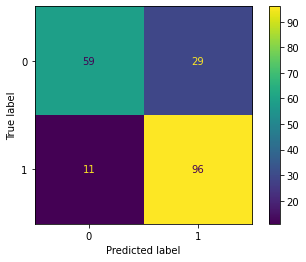

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=56)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

#Plot Confusion Matrix
print(plot_confusion_matrix(gb,x_test,y_test))

In [174]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.74358974 0.71153846 0.80769231 0.78846154 0.45512821]
--------------------------------------------------
K-Fold Cross Validation Score :  70.12820512820512


In [175]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
g3 = cross_val_score(gb,X_scaled,Y,cv=Stra_K_fold)
print(g3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",g3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.71153846 0.75       0.75       0.76923077 0.82051282]
--------------------------------------------------------
Stratified K Fold :  76.02564102564102


In [176]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.81623932 0.79487179 0.78205128 0.75213675 0.73504274]
--------------------------------------------------
 Stratified Shuffle Split :  77.60683760683762


Roc Curve

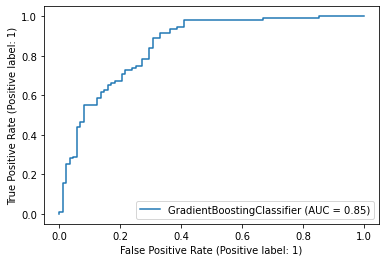

In [177]:
plot_roc_curve(gb,x_test,y_test)

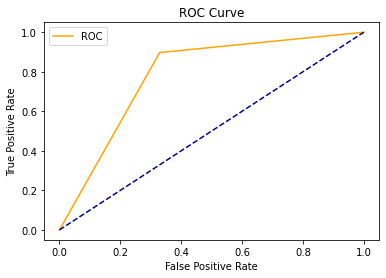

78.38254035683941

In [178]:
fpr,tpr ,thresholds = roc_curve(y_test,y_gb)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_gb)
auc_score*100

# 7]Xgboost

In [179]:
import xgboost as xgb

Finding the random state for our model

In [180]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    xgbt=xgb.XGBClassifier()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    accuracy_xgbt = accuracy_score(y_test, y_xgbt)
    
    if accuracy_xgbt>maxAccuracy:
        maxAccuracy=accuracy_xgbt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.841025641025641  on Random State 46


Accuracy score :  84.1025641025641
---------------------------------------------
[0.72435897 0.78846154 0.74358974 0.78205128 0.84615385]
Cross Validation Score :  0.7769230769230769
---------------------------------------------
[[72 16]
 [15 92]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        88
           1       0.85      0.86      0.86       107

    accuracy                           0.84       195
   macro avg       0.84      0.84      0.84       195
weighted avg       0.84      0.84      0.84       195



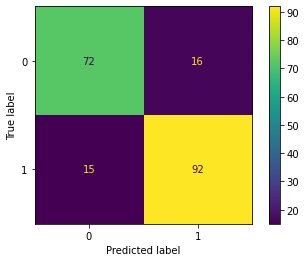

In [181]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=89)

#training our model
xgbt=xgb.XGBClassifier()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
accuracy_xgbt = accuracy_score(y_test, y_xgbt)

#Accuracy Score
print("Accuracy score : ", accuracy_xgbt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_xgbt= cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_val_xgbt)
print("Cross Validation Score : ",cross_val_xgbt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_xgbt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_xgbt))

#Plot Confusion Matrix
print(plot_confusion_matrix(xgbt,x_test,y_test))

In [182]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , xg1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.73076923 0.73717949 0.78205128 0.74358974 0.66666667]
--------------------------------------------------
K-Fold Cross Validation Score :  73.2051282051282


In [183]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
xg3 = cross_val_score(xgbt,X_scaled,Y,cv=Stra_K_fold)
print(xg3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",xg3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.72435897 0.78846154 0.74358974 0.78205128 0.84615385]
--------------------------------------------------------
Stratified K Fold :  77.6923076923077


In [184]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
xg2 = cross_val_score(xgbt,X_scaled,Y,cv=Stratified_Shuffle)
print(xg2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",xg2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.77435897 0.8        0.73846154 0.82051282 0.8       ]
--------------------------------------------------
 Stratified Shuffle Split :  78.66666666666667


Roc Curve

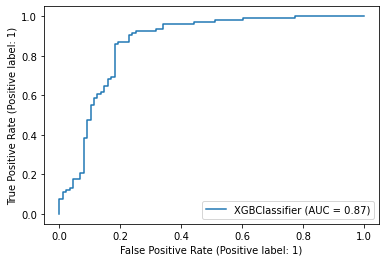

In [185]:
plot_roc_curve(xgbt,x_test,y_test)

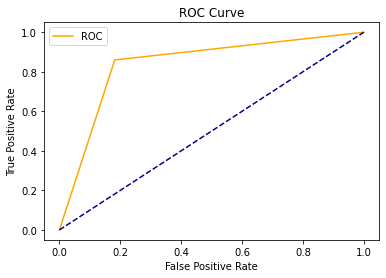

83.89974511469839

In [186]:
fpr,tpr ,thresholds = roc_curve(y_test,y_xgbt)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,y_xgbt)
auc_score*100

# Hyperparameter Tuning 

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

In [189]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [190]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [191]:
gs_rf.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

In [192]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=8, max_features='log2')

In [193]:
gs_rf.best_score_

0.7931623931623932

In [194]:
gs_rf.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 120},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 150},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 170},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 120},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 150},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 170},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt

In [195]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=3,
                       n_estimators=120)
------------------------------------------------------------------------
[1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 1 1 1 0 1 1 1 0 1 1]
Accuracy Score : 0.7897435897435897
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.97      0.60      0.74        97
           1       0.71      0.98      0.82        98

    accuracy                           0.79       195
   macro avg       0.84      0.79      0.78       195
weigh

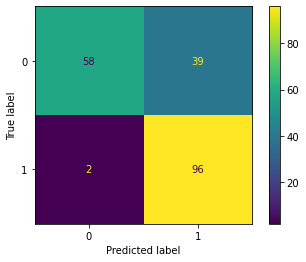

In [196]:
final_model = RandomForestClassifier(max_depth=8, min_samples_split=3,max_features='log2', n_estimators=120,criterion='gini')
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")
print("Confusion Matrix ")
print(plot_confusion_matrix(final_model,x_test,y_test))
print("------------------------------------------------------------------------")

As per the cross validation process , I will figure out the mean and get the results.

In [197]:
gs_rf.cv_results_['mean_test_score']

array([       nan,        nan,        nan,        nan, 0.71452991,
       0.72478632, 0.72136752, 0.72478632, 0.72307692, 0.71965812,
       0.71965812, 0.72307692,        nan,        nan,        nan,
              nan, 0.71794872, 0.72136752, 0.72136752, 0.71965812,
       0.72820513, 0.71965812, 0.72136752, 0.72649573,        nan,
              nan,        nan,        nan, 0.74871795, 0.75042735,
       0.75384615, 0.74188034, 0.74358974, 0.74871795, 0.74358974,
       0.74700855,        nan,        nan,        nan,        nan,
       0.74871795, 0.73675214, 0.75555556, 0.75213675, 0.75213675,
       0.73675214, 0.74188034, 0.75384615,        nan,        nan,
              nan,        nan, 0.77777778, 0.76923077, 0.76410256,
       0.76752137, 0.77094017, 0.76410256, 0.77948718, 0.77094017,
              nan,        nan,        nan,        nan, 0.77606838,
       0.76581197, 0.77435897, 0.76752137, 0.77606838, 0.77606838,
       0.77264957, 0.77948718,        nan,        nan,        

Best accuracy from training

In [198]:
print(gs_rf.score(x_test,y_test))

0.8564102564102564


# HyperParameter Tuning - II

Using Randomized Search CV

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
from scipy.stats import randint as sp_randint

In [201]:
params_1 = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [202]:
rs_rf = RandomizedSearchCV(rf,param_distributions=params_1,cv=5)

rs_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B4352B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B3F69D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B387280>})

In [203]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25)

In [204]:
rs_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B4352B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B3F69D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001913B387280>})

In [205]:
print(rs_rf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [206]:
rs_rf.best_estimator_

RandomForestClassifier(max_features=6, min_samples_split=5)

In [207]:
rs_rf.best_score_

0.7931623931623932

As per the Cross-Validation process, will figure out the mean and get the results

In [208]:
rs_rf.cv_results_['mean_test_score']

array([0.77777778, 0.79316239, 0.79145299, 0.73162393, 0.74188034,
       0.78974359, 0.74700855, 0.75042735, 0.74871795, 0.74358974])

Best accuracy for training

In [209]:
rs_rf.score(x_test,y_test)

0.7487179487179487

In [210]:
final_model_ = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=None,max_features=7,min_samples_leaf=2,
                                     min_samples_split=2)
print(final_model_)
print("------------------------------------------------------------------------")
final_model_.fit(x_train,y_train)
final_model_pred_ = final_model_.predict(x_test)
print(final_model_pred_)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred_))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred_))
print("-------------------------------------------------------------------------")

RandomForestClassifier(max_features=7, min_samples_leaf=2)
------------------------------------------------------------------------
[0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1]
Accuracy Score : 0.7589743589743589
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.61      0.72        96
           1       0.71      0.90      0.79        99

    accuracy                           0.76       195
   macro avg       0.78      0.76      0.75       195
weighted avg       0.78      0.76      0.75       195

----------

I did Hyperparameter Tuning with Grid Search Cv and Randomized Seach Cv for random forest model.The conculsion which I got is it has better accuracy for Grid Seach compared to Randomized Search Cv.Therefore,Grid Search Cv performed better for the model.

# Pretty Table

I have created a pretty table that will show all the details about the accuracy score and various other things.

In [211]:
from prettytable import PrettyTable

In [212]:
table = PrettyTable(['Model Name','Accuracy Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [213]:
table.add_row(['Logistic Regression','73.33','69.74','73.33','72.51'])
table.add_row(['K-NearestNeighbor','77.43','66.53','70.89','74.25'])
table.add_row(['Decision Tree','70.76','73.58','74.74','72.22'])
table.add_row(['SupportVectorClassifier','78.46','68.71','72.94','73.74'])
table.add_row(['Random Forest','86.66','78.58','80.51','82.46'])
table.add_row(['GradientBoost','84.10','70.51','76.66','77.26'])
table.add_row(['XgBoost','84.10','75.00','78.07','80.71'])

print(table)

+-------------------------+----------------+--------+-------------------+--------------------------+
|        Model Name       | Accuracy Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+-------------------------+----------------+--------+-------------------+--------------------------+
|   Logistic Regression   |     73.33      | 69.74  |       73.33       |          72.51           |
|    K-NearestNeighbor    |     77.43      | 66.53  |       70.89       |          74.25           |
|      Decision Tree      |     70.76      | 73.58  |       74.74       |          72.22           |
| SupportVectorClassifier |     78.46      | 68.71  |       72.94       |          73.74           |
|      Random Forest      |     86.66      | 78.58  |       80.51       |          82.46           |
|      GradientBoost      |     84.10      | 70.51  |       76.66       |          77.26           |
|         XgBoost         |     84.10      | 75.00  |       78.07       |          80.71   

# Saving the best model

In [214]:
import pickle

In [215]:
filename = 'Loan_Application_Status.pkl'

In [216]:
pickle.dump(gs_rf,open(filename,'wb'))

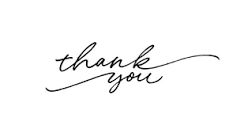